In [2]:
%load_ext autoreload
%autoreload 2

%autosave 10

#%load_ext lab_black

Autosaving every 10 seconds


In [3]:
import sys
import os

sys.path.insert(0, os.path.abspath(os.path.join("..")))

In [4]:
from lfp_analysis.data import *
from lfp_analysis.process import *
from lfp_analysis.resnet2d import *
from lfp_analysis.resnet1d import *
from lfp_analysis.svm import *
from lfp_analysis.report import *

from fastai.vision.all import *
import torch.nn.functional as F
from torchvision.transforms import ToPILImage, ToTensor

In [5]:
import numpy as np
import pandas as pd
import h5py

from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import to_hex
%matplotlib widget

import matplotlib
font = {'size'   :9}
matplotlib.rc('font', **font)

import seaborn as sns
WIN_LEN_SEC = 0.750

In [5]:
EXPERIMENT = "train_all_v3"
corr_coefs = []
for pat_id in range(1,9):
    for task in ["Pegboard","Pouring","Posture"]:
        data1 = getattr(Patient(pat_id),task+"_off")
        if data1 is None:
            continue
        else:
            data1 = data1.load_1d()
            windower1 = Windower(WIN_LEN_SEC).window(data1.label)
            cls1 = BLClassifier(data1.LFP, windower1.data_df, extract_method='periodogram')
            cls1.classify()
            
            gamma_chan_idx = np.where(
                [("31_45" in el) or ("46_60Hz" in el) or ("61_75" in el) or ("76_100" in el) for el in cls1.X_train.columns]
            )[0]
            
            gammas = cls1.X_train.iloc[:,gamma_chan_idx].values
            
            gammas_local = []
            for ii in range(gammas.shape[1]):
                gammas_local.append(np.corrcoef(gammas[:,ii],windower1.data_df[windower1.data_df['is_valid']==False]['label'])[0,1])
            
        
            rep = Reporter.from_pickle(pat_id, task, EXPERIMENT)
            
            corr_coefs.append([gammas_local,rep.svm.valid.AUC['mean']])
            #tasks.append(f"{rep.dataset.pat_id}/{rep.dataset.task}")
            #AUCs.append((rep.svm.valid.AUC['mean'],rep.beta.valid.AUC['mean'],rep.theta.valid.AUC['mean'],rep.cnn_1d.valid.AUC,rep.cnn_2d.valid.AUC))
            #Accs.append((rep.svm.valid.accuracy['mean'],rep.beta.valid.accuracy['mean'],rep.theta.valid.accuracy['mean'],rep.cnn_1d.valid.accuracy,rep.cnn_2d.valid.accuracy))
            

/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


AssertionError: feature extraction yields NaN values (check whether filter is unstable)

In [19]:
[[np.corrcoef(a) for el in all_data]for all_data,perfs in zip(corr_coefs,corr_coefs[1])]

,0,1
0,"[0.2331647122274798, 0.2500022614693283, -0.054964229676996025, 0.125615136530199, 0.1504155127891367, 0.24910496175933994, 0.04612127219317464, 0.03773906906397411, 0.08247766268323932, 0.23777242487403724, 0.019212902735197174, 0.06454188721325213, 0.08258397332312523, 0.19744902299297498, 0.026848148148273403, -0.04263091042040119]",0.733360
1,"[0.24155779948697068, -0.059348804178409126, 0.11614951223517564, 0.16056949698825543, 0.1109245883448225, -0.09362527778954331, 0.08323948273195146, 0.1653391526164782, 0.19090247797034862, -0.058349246444703476, 0.019481979834086234, 0.1370884374099215, 0.2172467182427088, -0.08179181096490533, 0.13172447730247827, 0.2007026971956009]",0.803929
2,"[0.060555603261607666, -0.2836316623310484, -0.033704115646766876, 0.08671799860705456, -0.0721430691669549, -0.2449615781051577, -0.013479647540738942, 0.0015615127223167935, -0.05586723011716477, -0.1638278576060335, 0.057017800574649946, 0.09779968262642001, 0.07030089130486293, 0.15502692700747006, 0.13384612095744547, 0.04742531019099871]",0.803927
3,"[0.31966738881070933, 0.33428856018043585, 0.3299441303968536, 0.32248277192303637, 0.37739579244756133, 0.38260311922693957, 0.35405359060880226, 0.3380881130966037, 0.348285003649686, 0.31050042518578225, 0.30171294018464406, 0.2963736837804561, 0.3592098273646865, 0.24644330058631242, 0.2946925138270298, 0.2771052203014841, 0.3700026716945443, 0.2891611361059673, 0.27099798449296475, 0.33489217946558214]",0.985977
4,"[0.2641478734281414, 0.40240038891833263, 0.37767653734504825, 0.3339550281923839, 0.26105794077901645, 0.3004673928797318, 0.37200656348318484, 0.3429318609113801, 0.48319128321876814, 0.3636072108403726, 0.44405021250687043, 0.46248305360919506, 0.3046668423277395, 0.4229887722002642, 0.4399697694795883, 0.41596008513248306, 0.292055754642689, 0.4350793705253404, 0.42714575645656, 0.3955703808623961]",0.906020
5,"[0.17358072869493413, 0.12971442184285997, 0.0477542914911064, 0.009047518455629235, 0.18668197306880727, 0.19859348750469394, 0.22177189617273638, 0.18283425272283604, 0.21637384718848438, 0.2029524994479604, 0.2080383098120107, 0.22015757775690173, 0.19515759722610043, 0.23150714356429972, 0.22074340237710843, 0.22336164423545823, 0.21386474730558344, 0.3206369437391682, 0.22230500349264426, 0.26422751650012904]",0.816838
6,"[0.04320291609519407, -0.10457493850126204, 0.029130176910281927, 0.05459342330900503, 0.08949923062233948, -0.12703071853608477, 0.10442616045582405, 0.14446335784707712, 0.14897810179085963, 0.2292356339344727, 0.16706777054976155, 0.11567159661279026, 0.18229566115608495, -0.051630975341622344, 0.1251613753532998, 0.1638269266589582]",0.836708
7,"[0.04517387682124009, 0.036661605555667276, -0.021930578967647295, 0.029695288558256053, -0.059638810429016906, -0.05932919898351144, -0.05958296532595176, -0.05955393725421524, 0.007893469787431698, 0.01256769419156182, 0.000467748294710974, 0.010844658817070882, 0.045134874848295585, -0.09164424699111338, 0.03258975301997412, 0.03850179562231091]",0.751667
8,"[0.1114399713764586, -0.34803818497624783, -0.09759825117340658, 0.09562560986348059, 0.043522171106161904, -0.040101233389769494, -0.04351205162631823, 0.0584484742773572, 0.21576644812177095, -0.3731934807681733, 0.005053068350289248, 0.06745847284733858, 0.3510091579981979, -0.5489769590181584, -0.13843359975663636, 0.011664412031158101, 0.24554158363381862, 0.009762309575147541, -0.0304444792020209, 0.036900727054598716, 0.168207266283402, -0.4713713824026684, 0.06400927287769438, 0.11394885351874755]",0.975339
9,"[0.04483111584293937, -0.23368196124927124, -0.02704929068032559, 0.07997994311716539, 0.1379372995162975, -0.13470474349218572, 0.040382464105040906, 0.12382019780337365, 0.28718680740526104, -0.3529146518599628, 0.14324782675506992, 0.07511364046376966, 0.013003124832053322, -0.3504608326418164, 0.0547989058028138, 0.12199728995971178]",0.930545


In [58]:
rec = Reporter.from_pickle(1,'Posture',"train_all_v3")

In [60]:
rec.cnn_1d

Score Summary Object
        Train: Scorer Object --- ds_type = train --- n_runs = 1 --- n_samp = 494

        Acc: 0.83
        AUC: 0.94
        precision: 0.80
        recall: 0.96
        loss: 0.398

        
        Valid: Scorer Object --- ds_type = train --- n_runs = 1 --- n_samp = 123

        Acc: 0.67
        AUC: 0.73
        precision: 0.70
        recall: 0.77
        loss: 0.590

        
        

In [13]:
data1.LFP.shape

(4, 1455948)

In [48]:
data1 = Patient(7).Posture_off.load_1d()
windower1 = Windower(WIN_LEN_SEC).window(data1.label)


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


In [51]:
cls1 = BLClassifier(data1.LFP, windower1.data_df, extract_method='periodogram')
cls1.classify_many()

Score Summary Object
        Train: Scorer Object --- ds_type = train --- n_runs = 10 --- n_samp = 429

        Acc: {'mean': 0.7524475524475525, 'std': 0.015629887752205324}
        AUC: {'mean': 0.8529836655835602, 'std': 0.006706806080927412}
        precision: {'mean': 0.8114367371970712, 'std': 0.015757286940547562}
        recall: {'mean': 0.7169491525423728, 'std': 0.029769776390254757}
        loss: {'mean': 0.55, 'std': 0.06}

        
        Valid: Scorer Object --- ds_type = valid --- n_runs = 10 --- n_samp = 107

        Acc: {'mean': 0.622429906542056, 'std': 0.017333866346720943}
        AUC: {'mean': 0.701247327156094, 'std': 0.012969509718729485}
        precision: {'mean': 0.669813694030636, 'std': 0.018581847152860015}
        recall: {'mean': 0.6672131147540984, 'std': 0.022055121388645436}
        loss: {'mean': 0.63, 'std': 0.06}

        
        

In [54]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

X_train_raw = cls1.X_train
X_valid_raw = cls1.X_valid

sc = StandardScaler().fit(X_train_raw)
X_train = sc.transform(X_train_raw)
X_valid = sc.transform(X_valid_raw)

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, cls1.y_train)

svc = SVC().fit(X_train,cls1.y_train)
svc.score(X_valid,cls1.y_valid), forest.score(X_valid,cls1.y_valid)

(0.7479674796747967, 0.7154471544715447)

In [55]:
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)

In [56]:
forest_importances = pd.Series(importances, index=X_train_raw.columns)

In [57]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [48]:
svc.score(X_valid,cls1.y_valid)

0.9345794392523364

In [8]:
cls1.X_valid

,pow0_2_7Hz,pow0_8_12Hz,pow0_13_20Hz,pow0_21_30Hz,pow0_31_45Hz,pow0_46_60Hz,pow0_61_75Hz,pow0_76_100Hz,pow1_2_7Hz,pow1_8_12Hz,...,pow2_61_75Hz,pow2_76_100Hz,pow3_2_7Hz,pow3_8_12Hz,pow3_13_20Hz,pow3_21_30Hz,pow3_31_45Hz,pow3_46_60Hz,pow3_61_75Hz,pow3_76_100Hz
0,170.027857,29.645938,3.431062,6.390206,1.104410,6.239838,0.202245,0.174397,38.043095,3.985316,...,0.027305,0.021300,1.881094,1.229496,0.137506,0.102604,0.033586,0.059980,0.013719,0.026425
1,5.979330,3.393468,1.860780,0.069394,0.104252,5.091988,0.097379,0.052409,1.180799,0.565945,...,0.020083,0.019154,0.491703,0.027739,0.083372,0.067269,0.033826,0.067367,0.016297,0.040612
2,0.519694,0.620696,0.089927,0.067468,0.109913,5.225575,0.114242,0.048539,0.045803,0.243363,...,0.021543,0.022176,0.084970,0.021154,0.068954,0.045423,0.042635,0.056950,0.015288,0.035452
3,0.479394,0.634913,0.042848,0.052559,0.103443,5.158474,0.034195,0.038091,0.018256,0.152024,...,0.023182,0.012182,0.071571,0.103874,0.060212,0.047414,0.040186,0.058357,0.017353,0.029747
4,0.167347,0.410094,0.241691,0.071965,0.165334,5.206737,0.094010,0.038177,0.116109,0.091490,...,0.034427,0.015342,0.067091,0.056452,0.060780,0.062426,0.023394,0.072679,0.011096,0.026517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.167434,0.084161,0.097291,0.079718,0.270874,10.825925,0.146589,0.061584,0.128623,0.087395,...,0.027072,0.026417,0.065556,0.032783,0.026276,0.033409,0.030628,0.078314,0.015571,0.026669
103,0.060422,0.136382,0.068101,0.055094,0.234732,11.228032,0.074521,0.043925,0.083486,0.116726,...,0.017641,0.024720,0.023914,0.143624,0.058687,0.048012,0.035951,0.075035,0.008389,0.039434
104,0.231108,0.105112,0.067749,0.149666,0.227055,11.921275,0.126426,0.049303,0.068269,0.034809,...,0.023170,0.016605,0.044552,0.025961,0.054560,0.044751,0.027890,0.076990,0.016156,0.025096
105,0.561898,0.261324,0.050240,0.049169,0.168449,11.413368,0.142992,0.044135,0.169413,0.056961,...,0.016635,0.025591,0.113545,0.108983,0.056452,0.050766,0.032838,0.105682,0.015737,0.021063


In [23]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(14,5))

#ax[0].plot(windower1.data_df['t'],np.concatenate([cls1.X_train["pow0_61_75Hz"].values, cls1.X_valid["pow0_61_75Hz"].values]))
ax[0].plot(windower1.data_df['t'],StandardScaler().fit_transform(np.concatenate([cls1.X_train["pow2_13_20Hz"].values, cls1.X_valid["pow2_13_20Hz"].values]).reshape(-1,1)))
ax[0].plot(windower1.data_df['t'],StandardScaler().fit_transform(np.concatenate([cls1.X_train["pow0_21_30Hz"].values, cls1.X_valid["pow2_21_30Hz"].values]).reshape(-1,1)))

ax[0].plot(windower1.data_df['t'],windower1.data_df['label'].values*4)
ax[-1].set_xlabel("Time [s]")
ax[0].set_title("Power in 46 - 60 Hz band")

ax[1].plot(windower1.data_df['t'],StandardScaler().fit_transform(np.concatenate([cls1.X_train["pow1_46_60Hz"].values, cls1.X_valid["pow1_46_60Hz"].values]).reshape(-1,1)))
ax[2].plot(windower1.data_df['t'],StandardScaler().fit_transform(np.concatenate([cls1.X_train["pow2_46_60Hz"].values, cls1.X_valid["pow2_46_60Hz"].values]).reshape(-1,1)))
ax[2].plot(windower1.data_df['t'],StandardScaler().fit_transform(np.concatenate([cls1.X_train["pow3_46_60Hz"].values, cls1.X_valid["pow3_46_60Hz"].values]).reshape(-1,1)))

#ax[2].plot(windower1.data_df['t'],np.concatenate([cls1.X_train["pow0_31_45Hz"].values, cls1.X_valid["pow0_31_45Hz"].values]))
#ax[2].plot(windower1.data_df['t'],np.concatenate([cls1.X_train["pow0_61_75Hz"].values, cls1.X_valid["pow0_61_75Hz"].values]))


#ax[2].plot(windower1.data_df['t'],np.concatenate([cls1.X_train["pow0_13_20Hz"].values, cls1.X_valid["pow0_13_20Hz"].values]))

#ax[3].plot(data1.t_decim(),data1.LFP_decim.T[:,1])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [1]:
data1 = Patient(1).Pegboard_off.load_1d()
data2 = Patient(1).Pegboard_on.load_1d()
data3 = Patient(8).Pouring_off.load_1d()

windower1 = Windower(WIN_LEN_SEC).window(data1.label)
windower2 = Windower(WIN_LEN_SEC).window(data2.label)
windower3 = Windower(WIN_LEN_SEC).window(data3.label)

NameError: name 'Patient' is not defined

In [9]:
data1, data2

(Dataset: ET1 - Pegboard_off
     n_chan = 4, duration = 11.85m
 ,
 Dataset: ET1 - Pegboard_on
     n_chan = 3, duration = 12.70m
 )

In [10]:
cls1 = BLClassifier(data1.LFP, windower1.data_df, extract_method='periodogram')
cls1.classify_many()

AssertionError: feature extraction yields NaN values (check whether filter is unstable)

In [8]:
cls2 = BLClassifier(data2.LFP, windower2.data_df, extract_method='periodogram')
cls2.classify_many()

Score Summary Object
        Train: Scorer Object --- ds_type = train --- n_runs = 10 --- n_samp = 724

        Acc: {'mean': 0.8697513812154696, 'std': 0.0010787637673904413}
        AUC: {'mean': 0.9470006028555511, 'std': 0.0003242231522124989}
        precision: {'mean': 0.9047066770828796, 'std': 0.0012696394372461674}
        recall: {'mean': 0.8257617728531855, 'std': 0.0023010038401434893}
        loss: {'mean': 0.41, 'std': 0.0}

        
        Valid: Scorer Object --- ds_type = valid --- n_runs = 10 --- n_samp = 181

        Acc: {'mean': 0.6458563535911603, 'std': 0.002975229175212426}
        AUC: {'mean': 0.6802702702702703, 'std': 0.0008120356012534284}
        precision: {'mean': 0.7145525383598776, 'std': 0.0024522463510081322}
        recall: {'mean': 0.7036036036036035, 'std': 0.004851499826247274}
        loss: {'mean': 0.63, 'std': 0.0}

        
        

In [9]:
data_concat = data1.concatenate(data2)
windower_concat = Windower(WIN_LEN_SEC).window(data_concat.label)

/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


In [10]:
data_concat

Dataset: ET8 - Pouring_off
    n_chan = 6, duration = 21.11m


In [11]:
cls_concat = BLClassifier(data_concat.LFP, windower_concat.data_df, extract_method='periodogram')
cls_concat.classify_many()

Score Summary Object
        Train: Scorer Object --- ds_type = train --- n_runs = 10 --- n_samp = 1351

        Acc: {'mean': 0.8672834937083642, 'std': 0.0016233687786425721}
        AUC: {'mean': 0.9438351778014642, 'std': 0.0010297171774878064}
        precision: {'mean': 0.8642810052358975, 'std': 0.0028565699662692298}
        recall: {'mean': 0.8625570776255709, 'std': 0.0032680229153095744}
        loss: {'mean': 0.39, 'std': 0.01}

        
        Valid: Scorer Object --- ds_type = valid --- n_runs = 10 --- n_samp = 337

        Acc: {'mean': 0.755192878338279, 'std': 0.004248611591476678}
        AUC: {'mean': 0.8122413793103448, 'std': 0.0008117816091954052}
        precision: {'mean': 0.7631167114094353, 'std': 0.004049776250125643}
        recall: {'mean': 0.8270833333333334, 'std': 0.006909634979907094}
        loss: {'mean': 0.52, 'std': 0.01}

        
        

In [13]:
trainer = Trainer1d(log_wandb=False, layers=[2],wd=50, experiment='concat').prepare_dls(data1,windower1).prepare_learner()

In [16]:
ResNet2d(4,2,[2,2,1])

ResNet2d(
  (0): ConvLayer(
    (0): Conv2d(4, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (1): ConvLayer(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (2): ConvLayer(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): ResBlock(
      (convs): Sequential(
        (0): ConvLayer(
          (0): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      

In [14]:
trainer.learn.summary()

ResNet1d (Input shape: 256)
Layer (type)         Output Shape         Param #    Trainable 
                     256 x 32 x 77       
Conv1d                                    576        True      
BatchNorm1d                               64         True      
ReLU                                                           
Conv1d                                    3072       True      
BatchNorm1d                               64         True      
ReLU                                                           
____________________________________________________________________________
                     256 x 64 x 77       
Conv1d                                    6144       True      
BatchNorm1d                               128        True      
ReLU                                                           
MaxPool1d                                                      
____________________________________________________________________________
                     256 x 16 

In [9]:
trainer.train(120, 0.5 * 1e-2)

epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.729176,0.408203,0.689713,0.554140,00:04
1,0.713935,0.460938,0.672549,0.509554,00:02
2,0.698206,0.478516,0.657457,0.509554,00:02
3,0.684344,0.550781,0.642788,0.509554,00:02
4,0.667917,0.804688,0.630408,0.509554,00:02
5,0.652950,0.830078,0.621840,0.528662,00:02
6,0.637608,0.839844,0.617402,0.859873,00:02
7,0.622935,0.812500,0.617323,0.808917,00:02
8,0.609084,0.814453,0.622887,0.770701,00:02
9,0.596865,0.796875,0.635073,0.694268,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.088935,0.990234,0.306677,0.866242,00:02
1,0.089318,0.988281,0.303225,0.872611,00:02
2,0.089379,0.988281,0.304378,0.866242,00:02
3,0.088244,0.992188,0.305757,0.866242,00:02
4,0.086526,0.990234,0.304466,0.859873,00:02


No improvement since epoch 1: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.079850,0.994141,0.297159,0.878981,00:02
1,0.082828,0.990234,0.290687,0.878981,00:02
2,0.083324,0.992188,0.288646,0.885350,00:02
3,0.084089,0.990234,0.289056,0.878981,00:02
4,0.083913,0.994141,0.291859,0.878981,00:02
5,0.083074,0.992188,0.300613,0.878981,00:02


No improvement since epoch 2: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.080178,0.992188,0.293862,0.878981,00:02
1,0.081236,0.992188,0.288833,0.878981,00:02
2,0.081002,0.990234,0.286302,0.878981,00:02
3,0.081143,0.992188,0.283680,0.878981,00:02
4,0.082381,0.994141,0.285332,0.878981,00:02
5,0.082072,0.990234,0.282667,0.885350,00:02
6,0.082147,0.990234,0.280224,0.885350,00:02
7,0.082136,0.990234,0.278281,0.885350,00:02
8,0.081721,0.990234,0.277420,0.885350,00:02
9,0.082301,0.992188,0.278195,0.885350,00:02


No improvement since epoch 7: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.077024,0.994141,0.280176,0.891720,00:02
1,0.077697,0.992188,0.280958,0.885350,00:02
2,0.078475,0.992188,0.279421,0.885350,00:02
3,0.078228,0.994141,0.278801,0.885350,00:02
4,0.078740,0.994141,0.277840,0.885350,00:02
5,0.078733,0.992188,0.277486,0.885350,00:02
6,0.079122,0.996094,0.278324,0.885350,00:02
7,0.078436,0.994141,0.278231,0.885350,00:02
8,0.077700,0.996094,0.278393,0.885350,00:02


No improvement since epoch 5: early stopping


In [11]:
cnn_1d_scores = trainer.score()
cnn_1d_scores

Score Summary Object
        Train: Scorer Object --- ds_type = train --- n_runs = 1 --- n_samp = 629

        Acc: 0.99
        AUC: 1.00
        precision: 0.99
        recall: 1.00
        loss: 0.076

        
        Valid: Scorer Object --- ds_type = train --- n_runs = 1 --- n_samp = 157

        Acc: 0.89
        AUC: 0.95
        precision: 0.84
        recall: 0.96
        loss: 0.278

        
        

In [16]:
trainer2 = Trainer1d(log_wandb=False, layers=[2,2],wd=50, experiment='concat').prepare_dls(data2,windower2).prepare_learner()
trainer.learn.dls = trainer2.dls

SuggestedLRs(lr_min=0.0019054606556892395, lr_steep=2.511886486900039e-05)

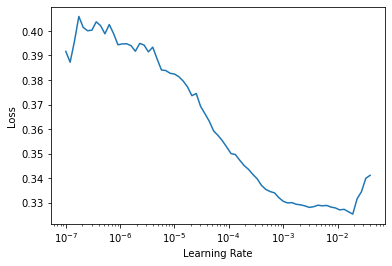

In [17]:
trainer.learn.lr_find()

In [18]:
trainer.train(30,slice(1e-5,0.5*1e-2))

epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.393032,0.845703,0.693411,0.751381,00:02
1,0.365343,0.861328,1.310364,0.629834,00:02
2,0.359910,0.861328,1.871747,0.629834,00:02
3,0.388222,0.814453,1.643378,0.524862,00:02
4,0.405328,0.783203,21.456480,0.375691,00:02
5,0.408927,0.802734,18.471451,0.375691,00:02
6,0.403423,0.841797,13.119236,0.375691,00:02
7,0.395287,0.839844,13.790449,0.375691,00:02
8,0.383508,0.861328,1.922541,0.436464,00:02
9,0.369667,0.900391,0.720326,0.640884,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.259827,0.910156,0.546689,0.718232,00:02
1,0.265096,0.894531,0.533789,0.729282,00:02
2,0.267128,0.890625,0.522880,0.751381,00:02
3,0.269999,0.898438,0.516575,0.745856,00:02
4,0.272237,0.890625,0.513935,0.762431,00:02
5,0.268992,0.900391,0.515297,0.762431,00:02
6,0.269937,0.888672,0.514880,0.756906,00:02
7,0.269081,0.888672,0.512747,0.767956,00:02
8,0.267010,0.906250,0.505277,0.745856,00:02
9,0.263877,0.919922,0.520418,0.740331,00:02


No improvement since epoch 8: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.241597,0.921875,0.507298,0.745856,00:02
1,0.241714,0.919922,0.500695,0.756906,00:02
2,0.244879,0.919922,0.497288,0.762431,00:02
3,0.241411,0.923828,0.495811,0.767956,00:02
4,0.242086,0.919922,0.496603,0.767956,00:02
5,0.240554,0.923828,0.498259,0.756906,00:02
6,0.241000,0.902344,0.496833,0.767956,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.231824,0.923828,0.493844,0.767956,00:02
1,0.230436,0.927734,0.492026,0.756906,00:02
2,0.233046,0.923828,0.491713,0.767956,00:02
3,0.233355,0.925781,0.491989,0.779006,00:02
4,0.232870,0.923828,0.491990,0.773481,00:02


No improvement since epoch 1: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.242690,0.910156,0.492269,0.779006,00:02
1,0.244396,0.917969,0.493013,0.790055,00:02
2,0.242980,0.914062,0.493882,0.784530,00:02
3,0.238710,0.919922,0.493746,0.784530,00:02


No improvement since epoch 0: early stopping


In [19]:
cnn_1d_scores = trainer.score()
cnn_1d_scores

Score Summary Object
        Train: Scorer Object --- ds_type = train --- n_runs = 1 --- n_samp = 727

        Acc: 0.92
        AUC: 0.97
        precision: 0.89
        recall: 0.97
        loss: 0.238

        
        Valid: Scorer Object --- ds_type = train --- n_runs = 1 --- n_samp = 181

        Acc: 0.78
        AUC: 0.82
        precision: 0.80
        recall: 0.88
        loss: 0.494

        
        

In [20]:
trainer.train(30,0.1*1e-2)

epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.229270,0.929688,0.494235,0.756906,00:02
1,0.236026,0.908203,0.530488,0.696133,00:02
2,0.240498,0.914062,0.574508,0.685083,00:02
3,0.250354,0.892578,0.701747,0.635359,00:02
4,0.266542,0.843750,0.689634,0.662983,00:02
5,0.278166,0.851562,0.853837,0.651934,00:02
6,0.280485,0.886719,0.574581,0.718232,00:02
7,0.285656,0.847656,0.552437,0.707182,00:02
8,0.284874,0.882812,0.612523,0.640884,00:02
9,0.284092,0.884766,1.511183,0.408840,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.246481,0.910156,0.532067,0.734807,00:02
1,0.247098,0.902344,0.530303,0.751381,00:02
2,0.247105,0.908203,0.530571,0.751381,00:02
3,0.242355,0.916016,0.533797,0.751381,00:02
4,0.241136,0.906250,0.535368,0.756906,00:02


No improvement since epoch 1: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.245389,0.900391,0.532121,0.751381,00:02
1,0.237605,0.910156,0.531620,0.740331,00:02
2,0.240488,0.896484,0.530533,0.740331,00:02
3,0.238833,0.908203,0.528082,0.740331,00:02
4,0.238035,0.912109,0.524040,0.745856,00:02
5,0.239166,0.902344,0.517624,0.756906,00:02
6,0.236507,0.923828,0.517377,0.756906,00:02
7,0.236341,0.921875,0.524545,0.751381,00:02
8,0.233842,0.917969,0.535570,0.729282,00:02


No improvement since epoch 5: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.226108,0.910156,0.530318,0.745856,00:02
1,0.233197,0.912109,0.527802,0.762431,00:02
2,0.229719,0.919922,0.527105,0.756906,00:02
3,0.232422,0.912109,0.528131,0.745856,00:02
4,0.233830,0.906250,0.528572,0.734807,00:02


No improvement since epoch 1: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.230315,0.912109,0.529751,0.745856,00:02
1,0.215853,0.933594,0.530818,0.756906,00:02
2,0.221376,0.910156,0.532291,0.745856,00:02
3,0.225147,0.902344,0.532967,0.745856,00:02


No improvement since epoch 0: early stopping


In [31]:
import itertools

In [23]:
WIN_LEN_SEC = 0.750

task_train_cont = [["Pouring","Posture"],["Pegboard","Posture"],["Pegboard","Pouring"]]
task_valid_cont = ["Pegboard","Pouring","Posture"]
#task_combs = list(itertools.product(["Pegboard","Pouring","Posture"],["Pegboard","Pouring","Posture"]))
#tasks = ["Pegboard","Pouring","Posture"]

res_cont = []
for ii,pat_id in enumerate(range(1,9)):
    for jj,(task_train,task_valid) in enumerate(zip(task_train_cont,task_valid_cont)):
        
        data1 = getattr(Patient(pat_id),task_train[0]+"_off")
        data2 = getattr(Patient(pat_id),task_train[1]+"_off")
        data_valid = getattr(Patient(pat_id),task_valid+"_off")
        
        if data_valid is None: 
            continue
        else:
            data_valid.load_1d()
            windower_valid = Windower(WIN_LEN_SEC).window(data_valid.label)
            data_concat = None
            if data1 is not None and data1.load_1d().n_chan == data_valid.n_chan:
                data_concat = data1
            if data2 is not None and data2.load_1d().n_chan == data_valid.n_chan:
                if data_concat is not None:
                    data_concat = data_concat.concatenate(data2)
                else:
                    data_concat = data2
            
            if data_concat is None:
                continue
            
            
            # SVMs:
            data_concat_all = data_concat.concatenate(data_valid)
            windower_all = Windower(WIN_LEN_SEC).window(data_concat_all.label)
            
            svm_scores_valid = BLClassifier(data_valid.LFP, windower_valid.data_df, extract_method='periodogram').classify_many()
            svm_scores_all = BLClassifier(data_concat_all.LFP, windower_all.data_df, extract_method='periodogram').classify_many()
            
            # CNNs:
            
            trainer_valid = Trainer1d(log_wandb=False, layers=[2],wd=30, experiment='concat').prepare_dls(data_valid,windower_valid).prepare_learner()
            trainer_valid.train(100,0.5*1e-2)
            cnn_scores_valid = trainer_valid.score()
            
            windower_concat = Windower(WIN_LEN_SEC).window(data_concat.label)
            trainer_concat = Trainer1d(log_wandb=False, layers=[2],wd=30, experiment='concat').prepare_dls(data_concat,windower_concat).prepare_learner()
            trainer_concat.train(100,0.5*1e-2)
            
            trainer_concat.learn.dls = trainer_valid.dls
            trainer_concat.train(70,slice(1e-6,0.1*1e-2))
            cnn_scores_concat = trainer_valid.score()
            
            res_cont.append((ii,jj,svm_scores_valid.valid.AUC['mean'],svm_scores_all.valid.AUC['mean'],cnn_scores_valid.valid.AUC, cnn_scores_concat.valid.AUC))



/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.709958,0.539062,0.850818,0.568421,00:02
1,0.709811,0.527344,0.778236,0.568421,00:02
2,0.704664,0.533203,0.736140,0.568421,00:02
3,0.702099,0.517578,0.711659,0.568421,00:02
4,0.698313,0.529297,0.699595,0.568421,00:02
5,0.695120,0.591797,0.697270,0.568421,00:02
6,0.692856,0.576172,0.699872,0.589474,00:02
7,0.691860,0.511719,0.704071,0.468421,00:02
8,0.690521,0.533203,0.705792,0.394737,00:02
9,0.688295,0.623047,0.706446,0.378947,00:02


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f3a8b56c5e0>
Traceback (most recent call last):
  File "/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/home/fernando/anaconda3/envs/all/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f3a8b56c5e0>
Traceback (most recent call last):
  File "/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/home/fernando/anaconda3/envs/all/lib/python3.9/s

epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.152352,1.000000,0.717130,0.600000,00:02
1,0.150611,0.996094,0.716029,0.600000,00:02
2,0.149741,0.998047,0.720630,0.600000,00:02
3,0.148376,0.996094,0.729579,0.615789,00:02
4,0.146736,0.998047,0.735434,0.615789,00:02


No improvement since epoch 1: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.138198,0.998047,0.727829,0.615789,00:02
1,0.138267,0.998047,0.722431,0.600000,00:02
2,0.138090,0.998047,0.719246,0.600000,00:02
3,0.137685,0.998047,0.717094,0.594737,00:02
4,0.139421,0.996094,0.715933,0.584211,00:02
5,0.138853,1.000000,0.716671,0.589474,00:02
6,0.138348,0.996094,0.717809,0.589474,00:02
7,0.138873,0.996094,0.716759,0.584211,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.131748,0.998047,0.718232,0.589474,00:02
1,0.133561,0.996094,0.720132,0.589474,00:02
2,0.133531,1.000000,0.721165,0.589474,00:02
3,0.134123,0.998047,0.722570,0.589474,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.142104,0.996094,0.722745,0.600000,00:02
1,0.138886,1.000000,0.723225,0.605263,00:02
2,0.135798,0.998047,0.724012,0.594737,00:02
3,0.134635,0.998047,0.725032,0.589474,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.638115,0.613281,0.712454,0.521226,00:02
1,0.634733,0.613932,0.700356,0.521226,00:02
2,0.634596,0.601562,0.696206,0.533019,00:02
3,0.632829,0.582682,0.695791,0.568396,00:02
4,0.631052,0.582031,0.696472,0.549528,00:02
5,0.629300,0.600260,0.695859,0.502358,00:02
6,0.628105,0.613281,0.694082,0.516509,00:02
7,0.626805,0.615234,0.693236,0.528302,00:02
8,0.626035,0.623698,0.692410,0.542453,00:02
9,0.624567,0.606771,0.691753,0.521226,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.337738,0.884766,0.621561,0.667453,00:02
1,0.337294,0.888672,0.622477,0.665094,00:02
2,0.336003,0.894531,0.631234,0.672170,00:02
3,0.335563,0.889974,0.632373,0.679245,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.331422,0.894531,0.628464,0.672170,00:02
1,0.328634,0.905599,0.627302,0.660377,00:02
2,0.327981,0.897135,0.627586,0.650943,00:02
3,0.328874,0.896484,0.627181,0.648585,00:02
4,0.327006,0.902344,0.632275,0.674528,00:02


No improvement since epoch 1: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.318758,0.910807,0.629419,0.655660,00:02
1,0.320891,0.901042,0.628338,0.648585,00:02
2,0.324061,0.899089,0.628291,0.650943,00:02
3,0.324241,0.901042,0.628787,0.650943,00:02
4,0.322150,0.916667,0.627158,0.653302,00:02
5,0.322864,0.902995,0.628418,0.646226,00:02
6,0.322047,0.910807,0.627856,0.643868,00:02
7,0.321903,0.910156,0.627003,0.646226,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.319426,0.906250,0.627040,0.650943,00:02
1,0.318617,0.910156,0.627359,0.650943,00:02
2,0.317964,0.915365,0.627606,0.650943,00:02
3,0.318439,0.905599,0.627938,0.650943,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.672761,0.646484,0.771008,0.552632,00:02
1,0.666530,0.652344,0.760497,0.594737,00:02
2,0.667258,0.638672,0.757268,0.578947,00:02
3,0.651059,0.683594,0.726489,0.631579,00:02
4,0.635481,0.724609,0.710684,0.657895,00:02
5,0.613476,0.757812,0.731366,0.684211,00:02
6,0.595383,0.771484,0.741512,0.626316,00:02
7,0.578331,0.789062,0.825956,0.468421,00:02
8,0.564841,0.775391,0.928729,0.457895,00:02
9,0.552623,0.791016,1.003720,0.436842,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.095193,1.000000,0.636092,0.684211,00:02
1,0.095460,1.000000,0.635572,0.689474,00:02
2,0.096232,1.000000,0.633856,0.694737,00:02
3,0.095840,1.000000,0.634296,0.694737,00:02
4,0.095343,1.000000,0.633165,0.689474,00:02
5,0.095322,1.000000,0.642623,0.678947,00:02


No improvement since epoch 2: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.088003,1.000000,0.641528,0.678947,00:02
1,0.089863,1.000000,0.640467,0.684211,00:02
2,0.090020,1.000000,0.640328,0.678947,00:02
3,0.089368,1.000000,0.640798,0.663158,00:02
4,0.089759,1.000000,0.641553,0.673684,00:02


No improvement since epoch 1: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.086846,1.000000,0.641466,0.673684,00:02
1,0.086182,1.000000,0.641285,0.673684,00:02
2,0.087125,1.000000,0.641177,0.673684,00:02
3,0.087492,1.000000,0.640858,0.668421,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.091079,1.000000,0.641114,0.663158,00:02
1,0.089985,1.000000,0.640810,0.663158,00:02
2,0.089434,1.000000,0.640603,0.663158,00:02
3,0.090036,1.000000,0.640594,0.663158,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.626952,0.648438,0.608624,0.663636,00:02
1,0.626415,0.640625,0.602178,0.663636,00:02
2,0.625136,0.636719,0.594893,0.663636,00:02
3,0.625242,0.625000,0.587457,0.663636,00:02
4,0.619712,0.656250,0.579809,0.663636,00:02
5,0.618380,0.613281,0.572333,0.663636,00:02
6,0.615938,0.621094,0.565145,0.663636,00:02
7,0.609309,0.679688,0.559328,0.663636,00:02
8,0.603830,0.652344,0.554662,0.663636,00:02
9,0.599396,0.660156,0.551651,0.663636,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.371679,0.851562,0.568612,0.718182,00:02
1,0.396268,0.800781,0.550365,0.709091,00:02
2,0.387261,0.847656,0.534181,0.709091,00:02
3,0.382862,0.839844,0.519473,0.745455,00:02
4,0.385042,0.832031,0.505359,0.754545,00:02
5,0.384799,0.832031,0.493234,0.745455,00:02
6,0.382329,0.851562,0.482305,0.754545,00:02
7,0.382959,0.839844,0.472130,0.763636,00:02
8,0.381252,0.875000,0.458565,0.754545,00:02
9,0.381132,0.843750,0.447997,0.772727,00:02


No improvement since epoch 12: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.359330,0.875000,0.438596,0.772727,00:02
1,0.358948,0.867188,0.434619,0.763636,00:02
2,0.359170,0.851562,0.430955,0.763636,00:02
3,0.358691,0.863281,0.429131,0.763636,00:02
4,0.358952,0.855469,0.428932,0.772727,00:02
5,0.360484,0.863281,0.428929,0.772727,00:02
6,0.363150,0.835938,0.429619,0.763636,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.351734,0.878906,0.427923,0.772727,00:02
1,0.350478,0.875000,0.426705,0.772727,00:02
2,0.354830,0.867188,0.425927,0.772727,00:02
3,0.350184,0.894531,0.425580,0.763636,00:02
4,0.351199,0.871094,0.425557,0.763636,00:02
5,0.353626,0.867188,0.425684,0.772727,00:02
6,0.356445,0.847656,0.426184,0.772727,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.371325,0.851562,0.426358,0.772727,00:02
1,0.380376,0.851562,0.426747,0.772727,00:02
2,0.379735,0.847656,0.427289,0.754545,00:02
3,0.376648,0.851562,0.427572,0.754545,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.700258,0.465495,0.627641,0.641509,00:02
1,0.689057,0.548828,0.604381,0.641509,00:02
2,0.682824,0.563151,0.591365,0.641509,00:02
3,0.677867,0.582682,0.579336,0.641509,00:02
4,0.675025,0.583984,0.557982,0.641509,00:02
5,0.672350,0.598958,0.551692,0.648585,00:02
6,0.670041,0.600260,0.587143,0.745283,00:02
7,0.667667,0.614583,0.634295,0.681604,00:02
8,0.665595,0.589844,0.658782,0.643868,00:02
9,0.663781,0.600911,0.670134,0.615566,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.238537,0.964844,0.527468,0.724057,00:02
1,0.238612,0.968750,0.529147,0.726415,00:02
2,0.236786,0.970052,0.532233,0.698113,00:02
3,0.235065,0.974609,0.539629,0.714623,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.228170,0.973958,0.542405,0.719340,00:02
1,0.227321,0.974609,0.541075,0.716981,00:02
2,0.226042,0.976562,0.536274,0.716981,00:02
3,0.225570,0.978516,0.533057,0.714623,00:02
4,0.225259,0.977214,0.531184,0.721698,00:02
5,0.224808,0.977214,0.531598,0.709906,00:02
6,0.224070,0.975260,0.540504,0.714623,00:02
7,0.222711,0.979167,0.533866,0.707547,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.211225,0.983724,0.534262,0.712264,00:02
1,0.207774,0.983724,0.537468,0.709906,00:02
2,0.208943,0.980469,0.539246,0.716981,00:02
3,0.209374,0.983073,0.541658,0.719340,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.208470,0.982422,0.542674,0.716981,00:02
1,0.209029,0.981771,0.542655,0.714623,00:02
2,0.208819,0.985026,0.542208,0.714623,00:02
3,0.209113,0.984375,0.544377,0.714623,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.557400,0.734375,0.640467,0.709091,00:02
1,0.549096,0.738281,0.538134,0.727273,00:02
2,0.533506,0.773438,0.419825,0.818182,00:02
3,0.527710,0.738281,0.403036,0.781818,00:02
4,0.518725,0.765625,0.488789,0.790909,00:02
5,0.518749,0.750000,0.627499,0.754545,00:02
6,0.514258,0.746094,0.882501,0.690909,00:02
7,0.503257,0.785156,1.313066,0.572727,00:02
8,0.494117,0.796875,2.107093,0.418182,00:02
9,0.482456,0.843750,3.062614,0.372727,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.064527,1.000000,0.543711,0.718182,00:02
1,0.068540,1.000000,0.531956,0.718182,00:02
2,0.069093,1.000000,0.524624,0.718182,00:02
3,0.068110,1.000000,0.520815,0.709091,00:02
4,0.068003,1.000000,0.525841,0.709091,00:02
5,0.068194,1.000000,0.534755,0.709091,00:02
6,0.068263,1.000000,0.548438,0.700000,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.066502,1.000000,0.537814,0.709091,00:02
1,0.065968,1.000000,0.529662,0.718182,00:02
2,0.064736,1.000000,0.522515,0.727273,00:02
3,0.064953,1.000000,0.518870,0.727273,00:02
4,0.064663,1.000000,0.515792,0.736364,00:02
5,0.064313,1.000000,0.515301,0.727273,00:02
6,0.064250,1.000000,0.518213,0.718182,00:02
7,0.064180,1.000000,0.524042,0.709091,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.062486,1.000000,0.516928,0.718182,00:02
1,0.064237,1.000000,0.512386,0.718182,00:02
2,0.062520,1.000000,0.506613,0.718182,00:02
3,0.061923,1.000000,0.501686,0.736364,00:02
4,0.062162,1.000000,0.498389,0.736364,00:02
5,0.062007,1.000000,0.497518,0.745455,00:02
6,0.063187,1.000000,0.499928,0.736364,00:02
7,0.062716,1.000000,0.498040,0.745455,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.060476,1.000000,0.494773,0.745455,00:02
1,0.064731,1.000000,0.494939,0.745455,00:02
2,0.063216,1.000000,0.491077,0.745455,00:02
3,0.062563,1.000000,0.488028,0.754545,00:02
4,0.062769,1.000000,0.486697,0.754545,00:02
5,0.062980,1.000000,0.486388,0.754545,00:02
6,0.062430,1.000000,0.483341,0.754545,00:02
7,0.062303,1.000000,0.482506,0.754545,00:02
8,0.062118,1.000000,0.479493,0.763636,00:02
9,0.062008,1.000000,0.478690,0.772727,00:02


No improvement since epoch 20: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.750351,0.394531,0.863730,0.422764,00:02
1,0.750062,0.417969,0.822042,0.422764,00:02
2,0.747642,0.417969,0.784973,0.422764,00:02
3,0.744261,0.472656,0.750143,0.422764,00:02
4,0.740172,0.410156,0.720123,0.422764,00:02
5,0.735328,0.507812,0.695674,0.536585,00:02
6,0.728790,0.539062,0.680382,0.560976,00:02
7,0.722303,0.562500,0.674836,0.577236,00:02
8,0.714906,0.621094,0.675975,0.577236,00:02
9,0.708166,0.625000,0.678954,0.577236,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.372659,0.886719,1.646876,0.577236,00:02
1,0.371871,0.878906,1.564903,0.577236,00:02
2,0.377580,0.859375,1.489997,0.577236,00:02
3,0.379540,0.878906,1.409977,0.577236,00:02
4,0.377395,0.898438,1.333548,0.577236,00:02
5,0.374164,0.898438,1.261834,0.577236,00:02
6,0.373865,0.867188,1.209591,0.577236,00:02
7,0.373346,0.878906,1.168096,0.577236,00:02
8,0.373652,0.878906,1.129740,0.577236,00:02
9,0.372395,0.882812,1.092957,0.577236,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.356804,0.894531,0.583850,0.658536,00:02
1,0.350899,0.914062,0.580106,0.658536,00:02
2,0.347318,0.925781,0.577344,0.666667,00:02
3,0.346661,0.914062,0.575751,0.699187,00:02
4,0.348371,0.898438,0.574766,0.699187,00:02
5,0.347648,0.910156,0.574109,0.699187,00:02
6,0.343798,0.925781,0.573434,0.691057,00:02
7,0.344189,0.902344,0.573694,0.691057,00:02
8,0.342911,0.910156,0.573058,0.699187,00:02
9,0.341890,0.917969,0.571993,0.699187,00:02


No improvement since epoch 11: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.362534,0.886719,0.570726,0.707317,00:02
1,0.342432,0.925781,0.570455,0.707317,00:02
2,0.344382,0.925781,0.570445,0.707317,00:02
3,0.344052,0.914062,0.570557,0.699187,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.315919,0.945312,0.570592,0.699187,00:02
1,0.323193,0.929688,0.570770,0.707317,00:02
2,0.325926,0.925781,0.570854,0.707317,00:02
3,0.333714,0.890625,0.570758,0.699187,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.675736,0.575521,0.670471,0.601415,00:02
1,0.666447,0.572266,0.670182,0.601415,00:02
2,0.658685,0.587891,0.668561,0.601415,00:02
3,0.652503,0.582682,0.668914,0.594340,00:02
4,0.647939,0.586589,0.674092,0.528302,00:02
5,0.644792,0.583984,0.686883,0.478774,00:02
6,0.641765,0.615885,0.698861,0.469340,00:02
7,0.638605,0.622396,0.701388,0.459906,00:02
8,0.635786,0.638672,0.699360,0.457547,00:02
9,0.632755,0.633464,0.699214,0.466981,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.273486,0.943359,0.708410,0.601415,00:02
1,0.272882,0.940104,0.711139,0.606132,00:02
2,0.271710,0.942057,0.705332,0.617925,00:02
3,0.271250,0.942057,0.707160,0.634434,00:02
4,0.270702,0.938802,0.709601,0.639151,00:02
5,0.269291,0.949219,0.686771,0.627358,00:02
6,0.268932,0.933594,0.788072,0.646226,00:02
7,0.267526,0.945312,0.819911,0.622642,00:02
8,0.265931,0.950521,0.729021,0.632075,00:02


No improvement since epoch 5: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.250631,0.952474,0.704513,0.646226,00:02
1,0.249746,0.954427,0.701467,0.643868,00:02
2,0.246229,0.960286,0.707736,0.646226,00:02
3,0.242371,0.966797,0.718803,0.622642,00:02
4,0.239553,0.966797,0.740649,0.634434,00:02


No improvement since epoch 1: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.227312,0.970052,0.721508,0.627358,00:02
1,0.225791,0.970052,0.722361,0.620283,00:02
2,0.225986,0.972005,0.730546,0.596698,00:02
3,0.226178,0.969401,0.742106,0.594340,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.226157,0.972005,0.737937,0.601415,00:02
1,0.227351,0.970052,0.735739,0.606132,00:02
2,0.227899,0.966797,0.734452,0.603774,00:02
3,0.226961,0.970703,0.733349,0.603774,00:02
4,0.225689,0.972656,0.732059,0.603774,00:02
5,0.224959,0.974609,0.731571,0.601415,00:02
6,0.224669,0.971354,0.730242,0.603774,00:02
7,0.225648,0.966797,0.730372,0.603774,00:02
8,0.225663,0.968750,0.729662,0.606132,00:02
9,0.225904,0.968750,0.728933,0.606132,00:02


No improvement since epoch 11: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.677792,0.683594,0.704114,0.634146,00:02
1,0.674962,0.644531,0.701401,0.634146,00:02
2,0.660774,0.687500,0.723258,0.609756,00:02
3,0.636956,0.722656,0.840777,0.569106,00:02
4,0.617547,0.722656,0.966727,0.536585,00:02
5,0.601119,0.726562,0.898522,0.569106,00:02
6,0.596285,0.710938,0.888323,0.593496,00:02
7,0.583120,0.750000,0.916136,0.601626,00:02
8,0.574103,0.753906,1.068250,0.536585,00:02
9,0.567419,0.761719,0.979618,0.520325,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.132073,1.000000,0.793342,0.634146,00:02
1,0.125690,1.000000,0.768114,0.650406,00:02
2,0.127179,1.000000,0.748581,0.650406,00:02
3,0.126746,1.000000,0.730596,0.642276,00:02
4,0.126236,1.000000,0.706285,0.658536,00:02
5,0.124996,1.000000,0.679804,0.674797,00:02
6,0.124468,1.000000,0.657674,0.691057,00:02
7,0.123796,0.996094,0.633406,0.715447,00:02
8,0.123267,0.996094,0.617202,0.699187,00:02
9,0.123506,0.996094,0.615298,0.682927,00:02


No improvement since epoch 9: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.116861,0.996094,0.660018,0.691057,00:02
1,0.109420,1.000000,0.655669,0.707317,00:02
2,0.107450,1.000000,0.652788,0.707317,00:02
3,0.105300,1.000000,0.651257,0.715447,00:02
4,0.109212,0.996094,0.659947,0.699187,00:02
5,0.107739,1.000000,0.667008,0.682927,00:02
6,0.106199,1.000000,0.677372,0.682927,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.101926,1.000000,0.669551,0.682927,00:02
1,0.103550,1.000000,0.664696,0.682927,00:02
2,0.104186,1.000000,0.661106,0.691057,00:02
3,0.103208,1.000000,0.657766,0.691057,00:02
4,0.103240,1.000000,0.657137,0.691057,00:02
5,0.102992,1.000000,0.657009,0.682927,00:02
6,0.102257,1.000000,0.656175,0.682927,00:02
7,0.102100,1.000000,0.655450,0.691057,00:02
8,0.101867,1.000000,0.654226,0.699187,00:02
9,0.101445,1.000000,0.652296,0.707317,00:02


No improvement since epoch 16: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.092960,1.000000,0.635464,0.699187,00:02
1,0.095802,1.000000,0.635644,0.699187,00:02
2,0.094634,1.000000,0.634964,0.691057,00:02
3,0.094196,1.000000,0.634082,0.691057,00:02
4,0.093457,1.000000,0.633726,0.691057,00:02
5,0.095475,1.000000,0.633939,0.691057,00:02
6,0.096205,1.000000,0.634165,0.691057,00:02


No improvement since epoch 3: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.621840,0.791667,0.535076,0.940594,00:02
1,0.605059,0.850260,0.521600,0.960396,00:02
2,0.587032,0.865885,0.497761,0.960396,00:02
3,0.567949,0.878906,0.470397,0.960396,00:02
4,0.548093,0.875000,0.446733,0.960396,00:02
5,0.527341,0.897135,0.429321,0.945545,00:02
6,0.506271,0.899740,0.421745,0.920792,00:02
7,0.487132,0.893229,0.428964,0.900990,00:02
8,0.469329,0.906250,0.452381,0.846535,00:02
9,0.453095,0.914062,0.498308,0.777228,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.073826,0.979167,0.065489,0.980198,00:02
1,0.076559,0.975260,0.065203,0.980198,00:02
2,0.076950,0.977865,0.065004,0.980198,00:02
3,0.077606,0.976562,0.065156,0.980198,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.076893,0.976562,0.065041,0.980198,00:02
1,0.075899,0.979167,0.064970,0.980198,00:02
2,0.075772,0.979167,0.064972,0.980198,00:02
3,0.078150,0.980469,0.064904,0.980198,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.082617,0.975260,0.064816,0.980198,00:02
1,0.081027,0.979167,0.064770,0.980198,00:02
2,0.079346,0.977865,0.064738,0.980198,00:02
3,0.078096,0.980469,0.064691,0.980198,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.084883,0.977865,0.064660,0.980198,00:02
1,0.082264,0.980469,0.064617,0.980198,00:02
2,0.080957,0.973958,0.064560,0.980198,00:02
3,0.080301,0.976562,0.064587,0.980198,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.635342,0.625651,0.515500,0.617433,00:02
1,0.612619,0.781901,0.508021,0.937046,00:02
2,0.590305,0.784505,0.486520,0.953995,00:02
3,0.569297,0.783203,0.463658,0.927361,00:02
4,0.548948,0.787109,0.448491,0.907990,00:02
5,0.530608,0.791667,0.450206,0.886199,00:02
6,0.514480,0.798828,0.477532,0.835351,00:02
7,0.499707,0.815755,0.536880,0.748184,00:02
8,0.483492,0.845703,0.603574,0.602906,00:02
9,0.464302,0.884766,0.672127,0.518160,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.189990,0.940755,0.078769,0.978208,00:02
1,0.190087,0.935547,0.078973,0.975787,00:02
2,0.191821,0.933594,0.079918,0.978208,00:02
3,0.191150,0.936849,0.082661,0.978208,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.193708,0.930339,0.081590,0.978208,00:02
1,0.190775,0.936849,0.080624,0.978208,00:02
2,0.193201,0.936198,0.079757,0.975787,00:02
3,0.192522,0.935547,0.079927,0.978208,00:02
4,0.192752,0.935547,0.081727,0.980630,00:02
5,0.192168,0.935547,0.080216,0.978208,00:02


No improvement since epoch 2: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.191974,0.936198,0.079712,0.978208,00:02
1,0.191467,0.935547,0.079730,0.978208,00:02
2,0.193450,0.930990,0.079833,0.978208,00:02
3,0.191108,0.935547,0.079993,0.978208,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.191567,0.934245,0.079649,0.978208,00:02
1,0.189583,0.936849,0.079431,0.978208,00:02
2,0.188769,0.940104,0.079546,0.978208,00:02
3,0.187827,0.938802,0.079595,0.978208,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.124712,0.962240,0.076540,0.985148,00:02
1,0.122625,0.959635,0.085716,0.970297,00:02
2,0.119055,0.968750,0.104661,0.965347,00:02
3,0.117898,0.967448,0.140259,0.940594,00:02
4,0.116115,0.962240,0.178826,0.940594,00:02
5,0.115068,0.962240,0.215553,0.935644,00:02
6,0.113254,0.967448,0.178113,0.940594,00:02
7,0.111120,0.973958,0.146221,0.940594,00:02
8,0.109387,0.967448,0.127585,0.950495,00:02
9,0.108253,0.964844,0.073498,0.985148,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.056170,0.986979,0.057028,0.975248,00:02
1,0.055499,0.990885,0.056561,0.975248,00:02
2,0.054835,0.990885,0.056648,0.975248,00:02
3,0.057135,0.984375,0.057387,0.975248,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.051432,0.990885,0.056371,0.975248,00:02
1,0.052795,0.989583,0.056040,0.975248,00:02
2,0.054639,0.988281,0.055913,0.975248,00:02
3,0.053904,0.990885,0.056012,0.975248,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.060316,0.984375,0.055821,0.975248,00:02
1,0.057438,0.989583,0.055630,0.975248,00:02
2,0.055035,0.992188,0.055497,0.975248,00:02
3,0.055701,0.992188,0.055458,0.975248,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.054667,0.988281,0.055515,0.975248,00:02
1,0.053509,0.993490,0.055509,0.975248,00:02
2,0.054560,0.990885,0.055574,0.975248,00:02
3,0.054015,0.992188,0.055616,0.975248,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.688889,0.589844,0.721676,0.573171,00:02
1,0.683128,0.585938,0.701261,0.573171,00:02
2,0.672790,0.609375,0.682778,0.597561,00:02
3,0.664919,0.601562,0.663409,0.646341,00:02
4,0.655113,0.656250,0.642578,0.780488,00:02
5,0.642514,0.714844,0.620943,0.865854,00:02
6,0.627586,0.804688,0.599403,0.890244,00:02
7,0.611908,0.851562,0.579155,0.890244,00:02
8,0.593608,0.894531,0.561219,0.890244,00:02
9,0.575293,0.898438,0.545820,0.890244,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.119733,0.968750,0.369853,0.878049,00:02
1,0.120123,0.960938,0.353991,0.902439,00:02
2,0.121129,0.957031,0.339703,0.902439,00:02
3,0.119246,0.964844,0.326531,0.902439,00:02
4,0.119613,0.964844,0.314475,0.902439,00:02
5,0.119925,0.960938,0.307187,0.902439,00:02
6,0.118926,0.960938,0.302901,0.902439,00:02
7,0.118945,0.953125,0.300484,0.902439,00:02
8,0.119793,0.957031,0.303287,0.902439,00:02
9,0.119048,0.968750,0.313188,0.902439,00:02


No improvement since epoch 7: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.121348,0.964844,0.317741,0.902439,00:02
1,0.120874,0.964844,0.314598,0.902439,00:02
2,0.114496,0.968750,0.311483,0.902439,00:02
3,0.115024,0.964844,0.309230,0.902439,00:02
4,0.112146,0.972656,0.306970,0.902439,00:02
5,0.114765,0.968750,0.304906,0.902439,00:02
6,0.115638,0.968750,0.303079,0.902439,00:02
7,0.116601,0.957031,0.302147,0.902439,00:02
8,0.117054,0.960938,0.301908,0.902439,00:02
9,0.116681,0.964844,0.301854,0.902439,00:02


No improvement since epoch 8: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.118384,0.957031,0.301142,0.902439,00:02
1,0.118740,0.960938,0.301394,0.902439,00:02
2,0.117969,0.964844,0.301632,0.902439,00:02
3,0.120092,0.984375,0.301786,0.902439,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.116693,0.960938,0.301952,0.902439,00:02
1,0.117531,0.960938,0.302173,0.902439,00:02
2,0.118921,0.960938,0.302398,0.902439,00:02
3,0.116637,0.964844,0.302636,0.902439,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.601132,0.789714,0.575727,0.426150,00:02
1,0.578370,0.809245,0.527368,0.767554,00:02
2,0.557918,0.810547,0.483575,0.910412,00:02
3,0.538706,0.818359,0.450725,0.917676,00:02
4,0.520503,0.829427,0.425366,0.915254,00:02
5,0.502882,0.843750,0.412485,0.912833,00:02
6,0.486696,0.850911,0.419720,0.910412,00:02
7,0.470150,0.870443,0.434590,0.895884,00:02
8,0.451123,0.886068,0.431096,0.871671,00:02
9,0.430033,0.899740,0.422284,0.849879,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.164669,0.942708,0.247412,0.920097,00:02
1,0.167161,0.938802,0.247812,0.920097,00:02
2,0.168568,0.940104,0.248653,0.920097,00:02
3,0.167472,0.939453,0.253581,0.905569,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.163193,0.940755,0.249617,0.917676,00:02
1,0.168057,0.934245,0.248834,0.917676,00:02
2,0.168258,0.942057,0.248660,0.920097,00:02
3,0.167150,0.942708,0.247230,0.917676,00:02
4,0.167409,0.937500,0.247523,0.915254,00:02
5,0.167832,0.938802,0.246560,0.920097,00:02
6,0.167194,0.940104,0.253899,0.912833,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.158964,0.945312,0.247652,0.920097,00:02
1,0.155997,0.948568,0.246275,0.920097,00:02
2,0.156435,0.942057,0.247113,0.917676,00:02
3,0.159289,0.936849,0.248042,0.917676,00:02
4,0.160485,0.940755,0.247678,0.917676,00:02


No improvement since epoch 1: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.160546,0.942057,0.247746,0.917676,00:02
1,0.156029,0.944010,0.247830,0.917676,00:02
2,0.160502,0.941406,0.248067,0.917676,00:02
3,0.160701,0.942708,0.248017,0.917676,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.241361,0.914062,0.365856,0.890244,00:02
1,0.227340,0.921875,0.318636,0.890244,00:02
2,0.224462,0.925781,0.308257,0.890244,00:02
3,0.219146,0.937500,0.517026,0.646341,00:02
4,0.214243,0.937500,0.641046,0.451219,00:02
5,0.211138,0.937500,0.362528,0.865854,00:02
6,0.211001,0.937500,0.304317,0.890244,00:02
7,0.205658,0.953125,0.356596,0.890244,00:02
8,0.204560,0.941406,0.362887,0.890244,00:02
9,0.202071,0.941406,0.331407,0.878049,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.077998,0.980469,0.361315,0.853659,00:02
1,0.082310,0.968750,0.341461,0.890244,00:02
2,0.082228,0.972656,0.323385,0.890244,00:02
3,0.082182,0.984375,0.308965,0.890244,00:02
4,0.078529,0.984375,0.300973,0.902439,00:02
5,0.078715,0.972656,0.317732,0.902439,00:02
6,0.078703,0.980469,0.331871,0.902439,00:02
7,0.078016,0.984375,0.325589,0.902439,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.086792,0.968750,0.325678,0.902439,00:02
1,0.077581,0.976562,0.326079,0.902439,00:02
2,0.079666,0.988281,0.324209,0.902439,00:02
3,0.081561,0.964844,0.319756,0.902439,00:02
4,0.078592,0.984375,0.313221,0.902439,00:02
5,0.079215,0.988281,0.305712,0.902439,00:02
6,0.079671,0.968750,0.307367,0.890244,00:02
7,0.080275,0.972656,0.324506,0.890244,00:02
8,0.080759,0.980469,0.345398,0.878049,00:02


No improvement since epoch 5: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.077160,0.984375,0.335222,0.890244,00:02
1,0.081582,0.964844,0.325233,0.890244,00:02
2,0.077983,0.984375,0.320050,0.890244,00:02
3,0.077909,0.976562,0.315660,0.890244,00:02
4,0.076241,0.984375,0.312119,0.890244,00:02
5,0.076405,0.972656,0.308997,0.890244,00:02
6,0.076840,0.980469,0.308460,0.902439,00:02
7,0.076427,0.976562,0.310670,0.902439,00:02
8,0.077412,0.976562,0.313186,0.902439,00:02


No improvement since epoch 5: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.073213,0.984375,0.314684,0.902439,00:02
1,0.076492,0.972656,0.316148,0.902439,00:02
2,0.076093,0.980469,0.317703,0.902439,00:02
3,0.075998,0.976562,0.319011,0.902439,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.771673,0.466797,0.842847,0.480620,00:02
1,0.759124,0.470703,0.775193,0.480620,00:02
2,0.746687,0.470703,0.727519,0.480620,00:02
3,0.732514,0.529297,0.690938,0.604651,00:02
4,0.717191,0.597656,0.663738,0.604651,00:02
5,0.701554,0.630859,0.646246,0.527132,00:02
6,0.686481,0.658203,0.636209,0.519380,00:02
7,0.672613,0.673828,0.631084,0.527132,00:02
8,0.660048,0.707031,0.629038,0.612403,00:03
9,0.649081,0.742188,0.631154,0.837209,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.112142,0.980469,0.456065,0.829457,00:02
1,0.111977,0.984375,0.457732,0.829457,00:02
2,0.110769,0.988281,0.458947,0.821705,00:02
3,0.109721,0.988281,0.459493,0.821705,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.104287,0.986328,0.461233,0.821705,00:02
1,0.110423,0.974609,0.462975,0.829457,00:02
2,0.108087,0.988281,0.463924,0.829457,00:02
3,0.107258,0.982422,0.464347,0.837209,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.103236,0.990234,0.465517,0.844961,00:02
1,0.104892,0.982422,0.466467,0.844961,00:02
2,0.103450,0.992188,0.467268,0.844961,00:02
3,0.103906,0.982422,0.467738,0.844961,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.113176,0.976562,0.468263,0.844961,00:02
1,0.107865,0.990234,0.468747,0.844961,00:02
2,0.106905,0.986328,0.468971,0.844961,00:02
3,0.106540,0.984375,0.469372,0.844961,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.740553,0.485026,0.723191,0.450363,00:02
1,0.704858,0.560547,0.687022,0.523002,00:02
2,0.669233,0.696615,0.666121,0.564165,00:02
3,0.632932,0.794271,0.652293,0.559322,00:02
4,0.599406,0.820312,0.648121,0.566586,00:02
5,0.570004,0.850911,0.654168,0.559322,00:02
6,0.543288,0.873047,0.671697,0.561743,00:02
7,0.519401,0.870443,0.701101,0.539952,00:02
8,0.497114,0.884115,0.744139,0.510896,00:02
9,0.473766,0.912760,0.795239,0.455206,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.150327,0.949219,0.348018,0.854722,00:02
1,0.148460,0.949219,0.347249,0.854722,00:02
2,0.149258,0.951172,0.348785,0.857143,00:02
3,0.148220,0.953125,0.349089,0.857143,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.154922,0.950521,0.349949,0.857143,00:02
1,0.147705,0.956380,0.349124,0.859564,00:02
2,0.148183,0.950521,0.348427,0.864407,00:02
3,0.146788,0.955078,0.347028,0.874092,00:02
4,0.146512,0.951172,0.347173,0.871671,00:02
5,0.145611,0.953125,0.347843,0.871671,00:02
6,0.146527,0.951172,0.351492,0.871671,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.143549,0.953776,0.352136,0.871671,00:02
1,0.146536,0.949870,0.354382,0.861985,00:02
2,0.144373,0.956380,0.355423,0.854722,00:02
3,0.144744,0.953776,0.356255,0.849879,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.147652,0.954427,0.355612,0.849879,00:02
1,0.147776,0.953125,0.356032,0.849879,00:02
2,0.147733,0.948568,0.354228,0.861985,00:02
3,0.145897,0.953776,0.355666,0.849879,00:02
4,0.147653,0.947266,0.357050,0.849879,00:02
5,0.146178,0.954427,0.357416,0.849879,00:02


No improvement since epoch 2: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.290869,0.888672,0.684177,0.775194,00:02
1,0.288264,0.888672,0.647264,0.790698,00:02
2,0.283390,0.892578,0.629162,0.806202,00:02
3,0.278177,0.894531,0.609114,0.806202,00:02
4,0.273306,0.900391,0.581151,0.813953,00:02
5,0.269402,0.902344,0.538512,0.798450,00:02
6,0.266319,0.902344,0.526105,0.806202,00:02
7,0.264456,0.892578,0.463486,0.798450,00:02
8,0.261788,0.908203,0.483159,0.821705,00:02
9,0.259714,0.912109,0.533883,0.837209,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.059358,0.996094,0.555473,0.829457,00:02
1,0.059136,0.998047,0.555960,0.829457,00:02
2,0.058540,0.998047,0.556031,0.829457,00:02
3,0.058475,0.998047,0.556394,0.829457,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.057728,0.998047,0.557498,0.829457,00:02
1,0.060239,0.994141,0.558183,0.829457,00:02
2,0.060077,0.998047,0.559202,0.829457,00:02
3,0.060319,0.996094,0.560269,0.829457,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.057652,0.998047,0.561033,0.829457,00:02
1,0.057958,0.998047,0.561676,0.837209,00:02
2,0.057798,0.998047,0.562052,0.837209,00:02
3,0.057462,0.998047,0.562660,0.837209,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.056684,0.998047,0.562990,0.837209,00:02
1,0.058829,0.998047,0.563350,0.837209,00:02
2,0.058232,0.998047,0.563451,0.837209,00:02
3,0.057820,0.998047,0.563675,0.837209,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.744542,0.492188,0.770223,0.408284,00:02
1,0.731919,0.513672,0.752159,0.408284,00:02
2,0.726807,0.498047,0.733274,0.408284,00:02
3,0.719324,0.515625,0.714114,0.414201,00:02
4,0.712717,0.509766,0.696158,0.550296,00:02
5,0.704854,0.617188,0.680978,0.603550,00:02
6,0.697012,0.652344,0.670410,0.526627,00:02
7,0.689026,0.634766,0.665178,0.532544,00:02
8,0.680869,0.628906,0.662715,0.532544,00:02
9,0.672293,0.660156,0.662470,0.526627,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.152073,0.988281,0.713696,0.733728,00:02
1,0.154196,0.986328,0.710572,0.727811,00:02
2,0.153251,0.986328,0.711241,0.733728,00:02
3,0.151938,0.990234,0.711376,0.727811,00:02
4,0.151457,0.988281,0.704843,0.721893,00:02
5,0.150382,0.986328,0.691454,0.733728,00:02
6,0.148872,0.988281,0.693515,0.733728,00:02
7,0.147830,0.988281,0.729032,0.715976,00:02
8,0.146796,0.988281,0.707835,0.721893,00:02


No improvement since epoch 5: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.138978,0.994141,0.701869,0.721893,00:02
1,0.139600,0.992188,0.698312,0.721893,00:02
2,0.140703,0.994141,0.696432,0.727811,00:02
3,0.139476,0.996094,0.697150,0.739645,00:02
4,0.136472,0.998047,0.699882,0.733728,00:02
5,0.137070,0.994141,0.706026,0.733728,00:02


No improvement since epoch 2: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.131704,0.996094,0.703992,0.745562,00:02
1,0.134062,0.990234,0.703728,0.745562,00:02
2,0.134034,0.992188,0.703511,0.745562,00:02
3,0.134632,0.994141,0.704032,0.739645,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.135487,0.992188,0.703142,0.745562,00:02
1,0.133811,0.992188,0.703057,0.751479,00:02
2,0.135108,0.992188,0.704078,0.751479,00:02
3,0.136023,0.992188,0.704214,0.745562,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.698520,0.521875,0.697322,0.425134,00:02
1,0.694161,0.525000,0.698994,0.475936,00:02
2,0.689379,0.539844,0.698301,0.475936,00:02
3,0.685462,0.544531,0.694906,0.475936,00:02
4,0.683012,0.547656,0.690649,0.475936,00:02
5,0.680413,0.575000,0.687937,0.502674,00:02
6,0.677513,0.642187,0.686622,0.566845,00:02
7,0.674314,0.631250,0.686216,0.564171,00:02
8,0.670667,0.617969,0.684711,0.697861,00:02
9,0.666392,0.665625,0.683858,0.550802,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.351588,0.867969,0.516183,0.745989,00:02
1,0.350278,0.866406,0.521193,0.740642,00:02
2,0.347024,0.878906,0.520525,0.743316,00:02
3,0.344091,0.884375,0.522910,0.735294,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.338168,0.881250,0.525785,0.737968,00:02
1,0.339803,0.870313,0.527066,0.735294,00:02
2,0.339983,0.884375,0.527310,0.735294,00:02
3,0.340533,0.873438,0.518135,0.743316,00:02
4,0.338704,0.881250,0.514074,0.743316,00:02
5,0.336417,0.889063,0.514660,0.748663,00:02
6,0.335064,0.882812,0.518070,0.745989,00:02
7,0.335896,0.881250,0.526305,0.735294,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.332264,0.885938,0.525517,0.732620,00:02
1,0.325684,0.892969,0.523857,0.732620,00:02
2,0.328512,0.884375,0.522321,0.740642,00:02
3,0.327765,0.890625,0.522877,0.740642,00:02
4,0.327752,0.884375,0.521313,0.745989,00:02
5,0.328573,0.899219,0.528262,0.732620,00:02
6,0.327036,0.890625,0.521677,0.743316,00:02
7,0.326549,0.886719,0.524258,0.735294,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.330299,0.888281,0.526974,0.727273,00:02
1,0.327369,0.882812,0.523269,0.727273,00:02
2,0.326474,0.882031,0.523647,0.737968,00:02
3,0.326515,0.886719,0.524657,0.732620,00:02
4,0.324783,0.892969,0.527495,0.729947,00:02


No improvement since epoch 1: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.457942,0.775391,0.770924,0.621302,00:02
1,0.448729,0.785156,0.742194,0.650888,00:02
2,0.440836,0.800781,0.746487,0.656805,00:02
3,0.438033,0.806641,0.789144,0.639053,00:02
4,0.434025,0.808594,0.861081,0.603550,00:02
5,0.427849,0.806641,0.827278,0.639053,00:02
6,0.419645,0.824219,0.666037,0.704142,00:02
7,0.415969,0.818359,0.646586,0.727811,00:02
8,0.411651,0.830078,0.654999,0.763314,00:02
9,0.404844,0.851562,0.609322,0.721893,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.039565,1.000000,0.689169,0.769231,00:02
1,0.038234,1.000000,0.688530,0.769231,00:02
2,0.037704,1.000000,0.692457,0.763314,00:02
3,0.037380,1.000000,0.703942,0.757396,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.035933,1.000000,0.695855,0.763314,00:02
1,0.037009,1.000000,0.691357,0.763314,00:02
2,0.036914,1.000000,0.688808,0.757396,00:02
3,0.036613,1.000000,0.688383,0.757396,00:02
4,0.036257,1.000000,0.688209,0.757396,00:02
5,0.036512,1.000000,0.683711,0.763314,00:02
6,0.036355,1.000000,0.685930,0.763314,00:02
7,0.037217,1.000000,0.690660,0.769231,00:02
8,0.037005,1.000000,0.697057,0.769231,00:02


No improvement since epoch 5: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.037619,1.000000,0.692053,0.763314,00:02
1,0.036255,1.000000,0.690034,0.769231,00:02
2,0.035435,1.000000,0.686918,0.763314,00:02
3,0.035695,1.000000,0.686314,0.757396,00:02
4,0.035521,1.000000,0.685569,0.763314,00:02
5,0.035335,1.000000,0.684440,0.763314,00:02
6,0.035481,1.000000,0.683246,0.763314,00:02
7,0.035511,1.000000,0.679893,0.763314,00:02
8,0.035448,1.000000,0.679728,0.763314,00:02
9,0.035583,1.000000,0.677287,0.751479,00:02


No improvement since epoch 11: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.034270,1.000000,0.676937,0.763314,00:02
1,0.034755,1.000000,0.677375,0.769231,00:02
2,0.034394,1.000000,0.677373,0.769231,00:02
3,0.034229,1.000000,0.677148,0.763314,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.694753,0.503906,0.707420,0.439024,00:02
1,0.692274,0.528646,0.700473,0.439024,00:02
2,0.690521,0.531250,0.694880,0.429268,00:02
3,0.688374,0.533854,0.690428,0.473171,00:02
4,0.686583,0.531250,0.687409,0.468293,00:02
5,0.685051,0.518229,0.684790,0.507317,00:02
6,0.682781,0.555990,0.683532,0.507317,00:02
7,0.680772,0.561198,0.684088,0.478049,00:02
8,0.678054,0.598958,0.681478,0.546341,00:02
9,0.675171,0.605469,0.680231,0.575610,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.296494,0.904948,0.462412,0.780488,00:02
1,0.295615,0.906250,0.462599,0.780488,00:02
2,0.295845,0.899740,0.464726,0.785366,00:02
3,0.296051,0.903646,0.474285,0.785366,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.297578,0.893229,0.468489,0.780488,00:02
1,0.293505,0.912760,0.465864,0.780488,00:02
2,0.294232,0.903646,0.463989,0.780488,00:02
3,0.293946,0.912760,0.462377,0.790244,00:02
4,0.292851,0.920573,0.463915,0.790244,00:02
5,0.292909,0.910156,0.465220,0.790244,00:02
6,0.292156,0.906250,0.473396,0.785366,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.291264,0.914062,0.468292,0.790244,00:02
1,0.290733,0.907552,0.465628,0.790244,00:02
2,0.288955,0.923177,0.463341,0.790244,00:02
3,0.288612,0.916667,0.461969,0.790244,00:02
4,0.287787,0.914062,0.459624,0.795122,00:02
5,0.287333,0.910156,0.459719,0.795122,00:02
6,0.287372,0.911458,0.460730,0.795122,00:02
7,0.286917,0.916667,0.461431,0.800000,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.284714,0.914062,0.461082,0.800000,00:02
1,0.287697,0.908854,0.457803,0.804878,00:02
2,0.287239,0.919271,0.457178,0.804878,00:02
3,0.286665,0.906250,0.457338,0.804878,00:02
4,0.286515,0.911458,0.457216,0.804878,00:02


No improvement since epoch 1: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.703913,0.566406,0.733428,0.422460,00:02
1,0.700935,0.546094,0.702997,0.430481,00:02
2,0.696610,0.567187,0.692300,0.526738,00:02
3,0.693076,0.545313,0.686966,0.593583,00:02
4,0.690048,0.550000,0.685102,0.641711,00:02
5,0.687350,0.547656,0.689974,0.483957,00:02
6,0.683737,0.554688,0.694961,0.425134,00:02
7,0.680142,0.600781,0.689049,0.502674,00:02
8,0.675420,0.662500,0.677447,0.609626,00:02
9,0.670467,0.635156,0.673733,0.582888,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.359460,0.867188,0.517303,0.743316,00:02
1,0.356631,0.868750,0.519973,0.740642,00:02
2,0.358452,0.861719,0.518113,0.737968,00:02
3,0.360324,0.860156,0.540408,0.716578,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.356581,0.865625,0.547278,0.716578,00:02
1,0.357797,0.866406,0.541375,0.719251,00:02
2,0.355529,0.866406,0.543249,0.716578,00:02
3,0.355692,0.875000,0.549449,0.716578,00:02
4,0.353649,0.881250,0.547043,0.721925,00:02


No improvement since epoch 1: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.343728,0.875781,0.544409,0.716578,00:02
1,0.349344,0.867188,0.543701,0.716578,00:02
2,0.351524,0.861719,0.540799,0.716578,00:02
3,0.351135,0.871875,0.536963,0.713904,00:02
4,0.349213,0.875781,0.528771,0.727273,00:02
5,0.347097,0.878125,0.534305,0.721925,00:02
6,0.348593,0.854688,0.532604,0.719251,00:02
7,0.349611,0.864062,0.534148,0.719251,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.349942,0.875000,0.538911,0.716578,00:02
1,0.341999,0.882812,0.542538,0.716578,00:02
2,0.345293,0.873438,0.539429,0.719251,00:02
3,0.347418,0.872656,0.537717,0.719251,00:02
4,0.347566,0.872656,0.535228,0.721925,00:02
5,0.346699,0.880469,0.539719,0.724599,00:02
6,0.347047,0.876562,0.540538,0.719251,00:02
7,0.348000,0.874219,0.543319,0.724599,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.490823,0.763021,0.567263,0.678049,00:02
1,0.479960,0.770833,0.729269,0.648780,00:02
2,0.480275,0.757812,0.764938,0.653659,00:02
3,0.473915,0.785156,0.575890,0.746341,00:02
4,0.465507,0.786458,0.428020,0.824390,00:02
5,0.457576,0.802083,0.441714,0.760976,00:02
6,0.450964,0.817708,0.438486,0.736585,00:02
7,0.445450,0.813802,0.444461,0.756098,00:02
8,0.441332,0.805990,0.564571,0.663415,00:02
9,0.436046,0.834635,0.477866,0.697561,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.070890,1.000000,0.493031,0.775610,00:02
1,0.070090,1.000000,0.511821,0.785366,00:02
2,0.069519,1.000000,0.537219,0.785366,00:02
3,0.070200,1.000000,0.507875,0.785366,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.067942,1.000000,0.504717,0.785366,00:02
1,0.071129,1.000000,0.501092,0.780488,00:02
2,0.070909,1.000000,0.498766,0.780488,00:02
3,0.069799,1.000000,0.492121,0.780488,00:02
4,0.069228,1.000000,0.483031,0.780488,00:02
5,0.069164,1.000000,0.476408,0.760976,00:02
6,0.069076,1.000000,0.480524,0.780488,00:02
7,0.068842,1.000000,0.487175,0.775610,00:02
8,0.068455,1.000000,0.496955,0.775610,00:02


No improvement since epoch 5: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.066769,1.000000,0.498255,0.775610,00:02
1,0.064837,1.000000,0.500007,0.775610,00:02
2,0.064075,1.000000,0.499037,0.775610,00:02
3,0.064221,1.000000,0.499862,0.775610,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.068023,1.000000,0.502093,0.780488,00:02
1,0.065041,1.000000,0.502340,0.780488,00:02
2,0.064749,1.000000,0.501363,0.775610,00:02
3,0.064112,1.000000,0.501610,0.780488,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.780681,0.500000,0.700895,0.447368,00:02
1,0.792971,0.460938,0.700462,0.473684,00:02
2,0.796364,0.453125,0.700290,0.464912,00:02
3,0.794782,0.453125,0.700686,0.464912,00:02
4,0.791230,0.453125,0.701835,0.482456,00:02
5,0.782771,0.468750,0.703962,0.482456,00:02
6,0.773715,0.468750,0.707073,0.482456,00:02
7,0.764657,0.453125,0.710890,0.482456,00:02
8,0.755284,0.472656,0.713515,0.482456,00:02
9,0.746193,0.609375,0.713205,0.482456,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.109947,1.000000,1.074837,0.517544,00:02
1,0.117962,0.996094,1.017983,0.517544,00:02
2,0.115113,0.996094,0.947230,0.517544,00:02
3,0.113198,1.000000,0.883244,0.526316,00:02
4,0.112700,1.000000,0.832226,0.561404,00:02
5,0.110633,1.000000,0.783501,0.578947,00:02
6,0.109872,1.000000,0.733113,0.587719,00:02
7,0.109321,1.000000,0.706977,0.596491,00:02
8,0.108815,1.000000,0.670265,0.596491,00:02
9,0.108395,1.000000,0.648745,0.596491,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.087499,1.000000,0.359919,0.842105,00:02
1,0.090237,1.000000,0.357986,0.842105,00:02
2,0.090948,1.000000,0.357845,0.842105,00:02
3,0.091758,1.000000,0.358531,0.842105,00:02
4,0.092075,1.000000,0.359160,0.842105,00:02


No improvement since epoch 1: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.087918,1.000000,0.358124,0.842105,00:02
1,0.087458,1.000000,0.356510,0.842105,00:02
2,0.088561,1.000000,0.356204,0.842105,00:02
3,0.088720,1.000000,0.355522,0.842105,00:02
4,0.089222,1.000000,0.354993,0.842105,00:02
5,0.088725,1.000000,0.354355,0.842105,00:02
6,0.089144,1.000000,0.354510,0.842105,00:02
7,0.089480,1.000000,0.355239,0.842105,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.087677,1.000000,0.353943,0.842105,00:02
1,0.087969,1.000000,0.353392,0.842105,00:02
2,0.088260,1.000000,0.352349,0.842105,00:02
3,0.088507,1.000000,0.351593,0.850877,00:02
4,0.088780,1.000000,0.350719,0.842105,00:02
5,0.088655,1.000000,0.350371,0.842105,00:02
6,0.088688,1.000000,0.350017,0.842105,00:02
7,0.089364,1.000000,0.349247,0.859649,00:02
8,0.089063,1.000000,0.349137,0.859649,00:02
9,0.089435,1.000000,0.348682,0.859649,00:02


No improvement since epoch 7: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.898151,0.526042,1.025420,0.449495,00:02
1,0.878831,0.526042,0.915927,0.449495,00:02
2,0.859448,0.522135,0.840215,0.449495,00:02
3,0.838085,0.518229,0.778672,0.449495,00:02
4,0.814434,0.518229,0.729409,0.449495,00:02
5,0.789703,0.519531,0.695843,0.449495,00:02
6,0.768117,0.563802,0.679006,0.712121,00:02
7,0.749747,0.729167,0.675198,0.560606,00:02
8,0.735215,0.639323,0.676302,0.550505,00:02
9,0.722735,0.615885,0.678229,0.550505,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.032067,1.000000,0.397012,0.813131,00:02
1,0.032034,1.000000,0.393519,0.818182,00:02
2,0.032085,1.000000,0.391732,0.818182,00:02
3,0.032399,1.000000,0.388690,0.833333,00:02
4,0.032048,1.000000,0.387964,0.828283,00:02
5,0.032024,1.000000,0.385602,0.823232,00:02
6,0.031736,1.000000,0.386596,0.823232,00:02
7,0.031440,1.000000,0.431427,0.803030,00:02
8,0.031446,1.000000,0.460044,0.787879,00:02


No improvement since epoch 5: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.028859,1.000000,0.435867,0.797980,00:02
1,0.028935,1.000000,0.420167,0.787879,00:02
2,0.028915,1.000000,0.411027,0.797980,00:02
3,0.029220,1.000000,0.402401,0.808081,00:02
4,0.029544,1.000000,0.395135,0.823232,00:02
5,0.029518,1.000000,0.394530,0.823232,00:02
6,0.029299,1.000000,0.395377,0.823232,00:02
7,0.029692,1.000000,0.393944,0.823232,00:02
8,0.029602,1.000000,0.400690,0.818182,00:02
9,0.029478,1.000000,0.393781,0.828283,00:02


No improvement since epoch 7: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.028654,1.000000,0.402533,0.823232,00:02
1,0.028645,1.000000,0.400062,0.828283,00:02
2,0.028571,1.000000,0.398406,0.823232,00:02
3,0.028456,1.000000,0.396954,0.823232,00:02
4,0.028261,1.000000,0.395261,0.823232,00:02
5,0.028248,1.000000,0.394081,0.823232,00:02
6,0.028206,1.000000,0.394570,0.823232,00:02
7,0.028104,1.000000,0.393871,0.823232,00:02
8,0.028067,1.000000,0.395137,0.823232,00:02


No improvement since epoch 5: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.027683,1.000000,0.394899,0.823232,00:02
1,0.027878,1.000000,0.394911,0.823232,00:02
2,0.027813,1.000000,0.394448,0.818182,00:02
3,0.027827,1.000000,0.394078,0.818182,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.216130,0.937500,0.464681,0.789474,00:02
1,0.225470,0.910156,0.470748,0.798246,00:02
2,0.216262,0.937500,0.470419,0.807018,00:02
3,0.209611,0.949219,0.465794,0.807018,00:02
4,0.197284,0.976562,0.451111,0.815789,00:02
5,0.187796,0.964844,0.418719,0.807018,00:02
6,0.178219,0.976562,0.376527,0.824561,00:02
7,0.172461,0.976562,0.929120,0.614035,00:02
8,0.169780,0.972656,1.107365,0.570175,00:02
9,0.165663,0.980469,0.605965,0.684211,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.019390,1.000000,0.308578,0.868421,00:02
1,0.019966,1.000000,0.303613,0.868421,00:02
2,0.020228,1.000000,0.306598,0.868421,00:02
3,0.020094,1.000000,0.312549,0.868421,00:02
4,0.019898,1.000000,0.320546,0.868421,00:02


No improvement since epoch 1: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.018746,1.000000,0.316388,0.868421,00:02
1,0.018764,1.000000,0.311587,0.868421,00:02
2,0.018573,1.000000,0.308207,0.868421,00:02
3,0.018826,1.000000,0.307320,0.868421,00:02
4,0.018928,1.000000,0.306913,0.868421,00:02
5,0.019180,1.000000,0.311030,0.868421,00:02
6,0.019205,1.000000,0.315910,0.868421,00:02
7,0.019154,1.000000,0.315903,0.868421,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.018584,1.000000,0.311497,0.868421,00:02
1,0.019066,1.000000,0.305119,0.868421,00:02
2,0.019007,1.000000,0.300182,0.868421,00:02
3,0.018951,1.000000,0.296936,0.868421,00:02
4,0.018904,1.000000,0.294589,0.868421,00:02
5,0.018931,1.000000,0.292179,0.885965,00:02
6,0.018948,1.000000,0.291019,0.885965,00:02
7,0.018865,1.000000,0.290596,0.877193,00:02
8,0.018876,1.000000,0.289373,0.877193,00:02
9,0.018892,1.000000,0.290062,0.877193,00:02


No improvement since epoch 11: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.021197,1.000000,0.285475,0.877193,00:02
1,0.020131,1.000000,0.285124,0.877193,00:02
2,0.019674,1.000000,0.284608,0.877193,00:02
3,0.019285,1.000000,0.284910,0.877193,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.788050,0.460938,0.702204,0.518072,00:02
1,0.776175,0.480469,0.700449,0.518072,00:02
2,0.769399,0.480469,0.698979,0.518072,00:02
3,0.766138,0.464844,0.697279,0.518072,00:02
4,0.758881,0.492188,0.695259,0.518072,00:02
5,0.751442,0.484375,0.692532,0.518072,00:02
6,0.744156,0.484375,0.689663,0.518072,00:02
7,0.737514,0.468750,0.686819,0.518072,00:02
8,0.730535,0.527344,0.684296,0.530120,00:02
9,0.723727,0.703125,0.682841,0.638554,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.075791,1.000000,1.173684,0.530120,00:02
1,0.075873,1.000000,1.114419,0.542169,00:02
2,0.075638,1.000000,1.056110,0.554217,00:02
3,0.076351,1.000000,1.009325,0.554217,00:02
4,0.076491,1.000000,0.967128,0.566265,00:02
5,0.076036,1.000000,0.924774,0.566265,00:02
6,0.076116,1.000000,0.886177,0.578313,00:02
7,0.075968,1.000000,0.849868,0.590361,00:02
8,0.075554,1.000000,0.811750,0.590361,00:02
9,0.075464,1.000000,0.754949,0.602410,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.064948,1.000000,0.396847,0.831325,00:02
1,0.065382,1.000000,0.393854,0.831325,00:02
2,0.066282,1.000000,0.393837,0.831325,00:02
3,0.065978,1.000000,0.392091,0.831325,00:02
4,0.065710,1.000000,0.392529,0.831325,00:02
5,0.065761,1.000000,0.394904,0.831325,00:02
6,0.065611,1.000000,0.398120,0.831325,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.064786,1.000000,0.396202,0.831325,00:02
1,0.064332,1.000000,0.394369,0.819277,00:02
2,0.065361,1.000000,0.391319,0.819277,00:02
3,0.065293,1.000000,0.390483,0.819277,00:02
4,0.065344,1.000000,0.390215,0.819277,00:02
5,0.064876,1.000000,0.390407,0.819277,00:02
6,0.064872,1.000000,0.389674,0.819277,00:02
7,0.064923,1.000000,0.391029,0.819277,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.064065,1.000000,0.390955,0.819277,00:02
1,0.064299,1.000000,0.390370,0.819277,00:02
2,0.063995,1.000000,0.390357,0.819277,00:02
3,0.063874,1.000000,0.389634,0.819277,00:02
4,0.063974,1.000000,0.388311,0.819277,00:02
5,0.064044,1.000000,0.387288,0.819277,00:02
6,0.064336,1.000000,0.385623,0.819277,00:02
7,0.064371,1.000000,0.385797,0.819277,00:02
8,0.064399,1.000000,0.385646,0.819277,00:02
9,0.064506,1.000000,0.384888,0.819277,00:02


No improvement since epoch 6: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,1.064518,0.502604,1.206856,0.419192,00:02
1,1.036193,0.506510,1.047258,0.419192,00:02
2,1.005390,0.513021,0.931283,0.419192,00:02
3,0.976061,0.506510,0.835982,0.419192,00:02
4,0.944579,0.502604,0.761486,0.419192,00:02
5,0.910065,0.505208,0.712703,0.419192,00:02
6,0.876131,0.505208,0.687747,0.590909,00:02
7,0.845856,0.604167,0.678203,0.580808,00:02
8,0.821972,0.523438,0.676417,0.580808,00:02
9,0.803483,0.492188,0.679821,0.580808,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.029572,1.000000,0.414826,0.782828,00:02
1,0.029454,1.000000,0.413908,0.777778,00:02
2,0.030473,1.000000,0.413310,0.782828,00:02
3,0.030114,1.000000,0.416029,0.782828,00:02
4,0.030001,1.000000,0.420308,0.787879,00:02
5,0.029798,1.000000,0.420823,0.787879,00:02


No improvement since epoch 2: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.028362,1.000000,0.419584,0.777778,00:02
1,0.028926,1.000000,0.418752,0.767677,00:02
2,0.028814,1.000000,0.417918,0.772727,00:02
3,0.028750,1.000000,0.417205,0.777778,00:02
4,0.028731,1.000000,0.416586,0.797980,00:02
5,0.028602,1.000000,0.417129,0.797980,00:02
6,0.028568,1.000000,0.420933,0.787879,00:02
7,0.028519,1.000000,0.417662,0.787879,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.027800,1.000000,0.416903,0.782828,00:02
1,0.028823,1.000000,0.416562,0.777778,00:02
2,0.028467,1.000000,0.416480,0.782828,00:02
3,0.028331,1.000000,0.416337,0.782828,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.029723,1.000000,0.416670,0.787879,00:02
1,0.028770,1.000000,0.416659,0.787879,00:02
2,0.029593,1.000000,0.416658,0.782828,00:02
3,0.029037,1.000000,0.416771,0.782828,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.324826,0.832031,0.291043,0.915663,00:02
1,0.320074,0.855469,0.296284,0.891566,00:02
2,0.301261,0.894531,0.349252,0.843373,00:02
3,0.286957,0.882812,0.455021,0.746988,00:02
4,0.270177,0.949219,0.563696,0.710843,00:02
5,0.252790,0.968750,0.499891,0.710843,00:02
6,0.237898,0.980469,0.322437,0.843373,00:02
7,0.224581,0.996094,0.641691,0.698795,00:02
8,0.213717,0.992188,0.907628,0.650602,00:02
9,0.205142,0.992188,0.613217,0.674699,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.017602,1.000000,0.382203,0.831325,00:02
1,0.017347,1.000000,0.379588,0.831325,00:02
2,0.017778,1.000000,0.378410,0.855422,00:02
3,0.017770,1.000000,0.377829,0.855422,00:02
4,0.017623,1.000000,0.378304,0.867470,00:02
5,0.017631,1.000000,0.378716,0.867470,00:02


No improvement since epoch 2: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.017201,1.000000,0.378117,0.867470,00:02
1,0.017145,1.000000,0.378295,0.867470,00:02
2,0.017039,1.000000,0.378595,0.867470,00:02
3,0.017201,1.000000,0.379797,0.867470,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.017086,1.000000,0.380310,0.867470,00:02
1,0.017129,1.000000,0.380354,0.867470,00:02
2,0.017429,1.000000,0.379299,0.867470,00:02
3,0.017397,1.000000,0.379536,0.855422,00:02
4,0.017546,1.000000,0.378335,0.855422,00:02
5,0.017524,1.000000,0.378534,0.855422,00:02


No improvement since epoch 2: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.017930,1.000000,0.380349,0.855422,00:02
1,0.017764,1.000000,0.381770,0.855422,00:02
2,0.017807,1.000000,0.383873,0.843373,00:02
3,0.017716,1.000000,0.385595,0.831325,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.703503,0.437500,0.715923,0.442105,00:02
1,0.700667,0.445312,0.711162,0.452632,00:02
2,0.698884,0.464844,0.706422,0.431579,00:02
3,0.697038,0.503906,0.701388,0.421053,00:02
4,0.694167,0.574219,0.695832,0.473684,00:02
5,0.691903,0.578125,0.689820,0.536842,00:02
6,0.690123,0.578125,0.683819,0.600000,00:02
7,0.687897,0.562500,0.678760,0.557895,00:02
8,0.685365,0.562500,0.674664,0.557895,00:02
9,0.682205,0.550781,0.671747,0.557895,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.080500,1.000000,0.441206,0.831579,00:02
1,0.081878,1.000000,0.435524,0.810526,00:02
2,0.082079,1.000000,0.431589,0.810526,00:02
3,0.082337,1.000000,0.428659,0.810526,00:02
4,0.082505,1.000000,0.427622,0.810526,00:02
5,0.082646,1.000000,0.424248,0.810526,00:02
6,0.081863,1.000000,0.425526,0.810526,00:02
7,0.081394,1.000000,0.420831,0.810526,00:02
8,0.081069,1.000000,0.418411,0.821053,00:02
9,0.080752,1.000000,0.411769,0.821053,00:02


No improvement since epoch 10: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.076159,1.000000,0.418863,0.821053,00:02
1,0.075893,1.000000,0.415046,0.810526,00:02
2,0.075074,1.000000,0.411251,0.810526,00:02
3,0.074840,1.000000,0.408420,0.821053,00:02
4,0.074690,1.000000,0.405969,0.821053,00:02
5,0.074748,1.000000,0.403957,0.821053,00:02
6,0.074529,1.000000,0.398853,0.821053,00:02
7,0.074069,1.000000,0.394732,0.821053,00:02
8,0.073776,1.000000,0.393044,0.821053,00:02
9,0.073517,1.000000,0.388119,0.821053,00:02


No improvement since epoch 17: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.068294,1.000000,0.369238,0.821053,00:02
1,0.069528,1.000000,0.369155,0.821053,00:02
2,0.070206,1.000000,0.367999,0.821053,00:02
3,0.070406,1.000000,0.367781,0.821053,00:02
4,0.069529,1.000000,0.367535,0.821053,00:02
5,0.069539,1.000000,0.367067,0.821053,00:02


No improvement since epoch 2: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.067134,1.000000,0.366512,0.831579,00:02
1,0.068327,1.000000,0.366312,0.831579,00:02
2,0.067762,1.000000,0.366314,0.831579,00:02
3,0.068496,1.000000,0.366631,0.821053,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.750735,0.520833,0.781599,0.471154,00:02
1,0.739898,0.522135,0.754055,0.471154,00:02
2,0.728687,0.528646,0.734149,0.471154,00:02
3,0.719272,0.519531,0.716273,0.471154,00:02
4,0.709957,0.519531,0.700123,0.471154,00:02
5,0.701221,0.597656,0.687311,0.480769,00:02
6,0.694674,0.628906,0.679618,0.552885,00:02
7,0.689407,0.588542,0.676655,0.663462,00:02
8,0.685526,0.572917,0.677078,0.735577,00:02
9,0.680679,0.615885,0.679141,0.730769,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.093725,1.000000,0.384796,0.846154,00:02
1,0.094181,1.000000,0.386934,0.846154,00:02
2,0.093943,1.000000,0.396759,0.846154,00:02
3,0.093398,1.000000,0.418494,0.826923,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.093868,1.000000,0.407878,0.822115,00:02
1,0.093309,1.000000,0.401694,0.836538,00:02
2,0.094140,1.000000,0.396711,0.836538,00:02
3,0.093291,1.000000,0.388483,0.831731,00:02
4,0.092836,1.000000,0.380158,0.831731,00:02
5,0.092555,1.000000,0.380016,0.836538,00:02
6,0.092410,1.000000,0.385365,0.836538,00:02
7,0.091931,1.000000,0.400475,0.831731,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.087183,1.000000,0.396409,0.836538,00:02
1,0.088706,1.000000,0.393342,0.831731,00:02
2,0.088694,1.000000,0.391879,0.831731,00:02
3,0.088080,1.000000,0.390293,0.831731,00:02
4,0.087787,1.000000,0.388371,0.831731,00:02
5,0.088772,1.000000,0.386519,0.831731,00:02
6,0.088368,1.000000,0.385068,0.831731,00:02
7,0.088040,1.000000,0.384493,0.831731,00:02
8,0.088221,1.000000,0.384540,0.831731,00:02
9,0.087979,1.000000,0.385591,0.826923,00:02


No improvement since epoch 6: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.086559,1.000000,0.385769,0.831731,00:02
1,0.087232,1.000000,0.385892,0.831731,00:02
2,0.086972,1.000000,0.385909,0.831731,00:02
3,0.087036,1.000000,0.385808,0.831731,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.242903,0.910156,0.511551,0.736842,00:02
1,0.235095,0.921875,0.507450,0.768421,00:02
2,0.241082,0.910156,0.504313,0.757895,00:02
3,0.233829,0.949219,0.536398,0.736842,00:02
4,0.222290,0.953125,0.670581,0.652632,00:02
5,0.221279,0.945312,1.064340,0.600000,00:02
6,0.214518,0.972656,1.629753,0.484211,00:02
7,0.208930,0.960938,1.755756,0.463158,00:02
8,0.202558,0.972656,1.126070,0.557895,00:02
9,0.199420,0.968750,0.616829,0.684211,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.029746,1.000000,0.363707,0.873684,00:02
1,0.029289,1.000000,0.361379,0.863158,00:02
2,0.029759,1.000000,0.358963,0.863158,00:02
3,0.030096,1.000000,0.358683,0.863158,00:02
4,0.030017,1.000000,0.360141,0.863158,00:02
5,0.030050,1.000000,0.364569,0.863158,00:02


No improvement since epoch 2: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.030603,1.000000,0.363772,0.863158,00:02
1,0.030020,1.000000,0.362947,0.863158,00:02
2,0.030271,1.000000,0.362447,0.863158,00:02
3,0.030657,1.000000,0.362774,0.863158,00:02
4,0.030519,1.000000,0.363183,0.873684,00:02
5,0.030430,1.000000,0.364380,0.873684,00:02


No improvement since epoch 2: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.029680,1.000000,0.363619,0.873684,00:02
1,0.029629,1.000000,0.361843,0.873684,00:02
2,0.029792,1.000000,0.361235,0.873684,00:02
3,0.029921,1.000000,0.360952,0.873684,00:02
4,0.029984,1.000000,0.360644,0.873684,00:02
5,0.029984,1.000000,0.360323,0.873684,00:02
6,0.029797,1.000000,0.359633,0.873684,00:02
7,0.029742,1.000000,0.359123,0.873684,00:02
8,0.029707,1.000000,0.357464,0.884211,00:02
9,0.029687,1.000000,0.356152,0.873684,00:02


No improvement since epoch 11: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.029985,1.000000,0.353202,0.884211,00:02
1,0.029220,1.000000,0.353070,0.884211,00:02
2,0.029225,1.000000,0.352985,0.884211,00:02
3,0.029205,1.000000,0.352435,0.894737,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.697535,0.554688,0.765846,0.548673,00:02
1,0.687019,0.597656,0.745181,0.548673,00:02
2,0.690056,0.527344,0.729236,0.548673,00:02
3,0.688490,0.558594,0.716255,0.548673,00:02
4,0.686675,0.550781,0.705271,0.548673,00:02
5,0.683535,0.605469,0.697221,0.548673,00:02
6,0.682253,0.550781,0.690351,0.548673,00:02
7,0.681420,0.554688,0.684667,0.548673,00:02
8,0.679958,0.566406,0.681147,0.548673,00:02
9,0.677816,0.550781,0.679030,0.548673,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.188564,0.984375,0.933101,0.557522,00:02
1,0.192608,0.976562,0.908887,0.566372,00:02
2,0.191881,0.980469,0.885359,0.575221,00:02
3,0.193048,0.984375,0.864161,0.575221,00:02
4,0.192431,0.980469,0.838532,0.584071,00:02
5,0.190845,0.984375,0.826970,0.584071,00:02
6,0.188927,0.988281,0.807722,0.575221,00:02
7,0.187994,0.996094,0.784861,0.601770,00:02
8,0.187146,0.992188,0.786470,0.601770,00:02
9,0.185738,1.000000,0.792781,0.601770,00:02


No improvement since epoch 13: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.169039,0.992188,0.702058,0.654867,00:02
1,0.170668,0.992188,0.694326,0.663717,00:02
2,0.169834,0.996094,0.686283,0.672566,00:02
3,0.168934,1.000000,0.678341,0.672566,00:02
4,0.169019,0.992188,0.670106,0.672566,00:02
5,0.168549,0.996094,0.658377,0.672566,00:02
6,0.168145,0.996094,0.647274,0.663717,00:02
7,0.167645,0.996094,0.638018,0.672566,00:02
8,0.165973,0.996094,0.632429,0.663717,00:02
9,0.165797,1.000000,0.632924,0.646018,00:02


No improvement since epoch 8: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.170155,1.000000,0.637017,0.654867,00:02
1,0.164359,0.996094,0.637166,0.654867,00:02
2,0.162118,0.996094,0.635981,0.654867,00:02
3,0.159009,0.992188,0.633366,0.654867,00:02
4,0.159158,0.996094,0.633199,0.654867,00:02
5,0.161010,1.000000,0.635095,0.654867,00:02
6,0.160142,0.996094,0.635511,0.663717,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.170028,1.000000,0.636968,0.663717,00:02
1,0.161037,0.996094,0.635057,0.663717,00:02
2,0.158810,1.000000,0.633916,0.672566,00:02
3,0.160074,0.996094,0.634372,0.672566,00:02
4,0.160199,0.996094,0.633927,0.672566,00:02
5,0.161907,0.996094,0.635797,0.663717,00:02


No improvement since epoch 2: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.698646,0.529948,0.780189,0.451923,00:02
1,0.693390,0.552083,0.720820,0.451923,00:02
2,0.688165,0.602865,0.693318,0.519231,00:02
3,0.682225,0.651042,0.681951,0.562500,00:02
4,0.677289,0.692708,0.680271,0.548077,00:02
5,0.672341,0.682292,0.682077,0.548077,00:02
6,0.667056,0.673177,0.680771,0.548077,00:02
7,0.660738,0.712240,0.675887,0.548077,00:02
8,0.654023,0.748698,0.671899,0.586538,00:02
9,0.647605,0.729167,0.672697,0.596154,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.113765,0.996094,0.704078,0.625000,00:02
1,0.111442,0.996094,0.707218,0.625000,00:02
2,0.110409,0.996094,0.713943,0.629808,00:02
3,0.110379,0.994792,0.716271,0.629808,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.105354,0.994792,0.712079,0.634615,00:02
1,0.106141,0.996094,0.708917,0.629808,00:02
2,0.106249,0.996094,0.705818,0.625000,00:02
3,0.107405,0.996094,0.705503,0.625000,00:02
4,0.107182,0.996094,0.704314,0.625000,00:02
5,0.107034,0.996094,0.704230,0.625000,00:02
6,0.106697,0.996094,0.709981,0.625000,00:02
7,0.106270,0.996094,0.714237,0.634615,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.103698,0.996094,0.709551,0.629808,00:02
1,0.103714,0.996094,0.705647,0.625000,00:02
2,0.102946,0.996094,0.703089,0.620192,00:02
3,0.102821,0.996094,0.701383,0.620192,00:02
4,0.102902,0.996094,0.699307,0.620192,00:02
5,0.102965,0.996094,0.699107,0.615385,00:02
6,0.103021,0.996094,0.698704,0.610577,00:02
7,0.102935,0.996094,0.697056,0.605769,00:02
8,0.102386,0.997396,0.700272,0.615385,00:02
9,0.101913,0.996094,0.699765,0.615385,00:02


No improvement since epoch 7: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.099529,0.996094,0.701060,0.625000,00:02
1,0.100469,0.997396,0.700244,0.620192,00:02
2,0.100547,0.996094,0.699833,0.615385,00:02
3,0.101012,0.996094,0.699385,0.615385,00:02
4,0.101765,0.996094,0.699217,0.615385,00:02
5,0.101670,0.996094,0.699495,0.615385,00:02


No improvement since epoch 2: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.371142,0.832031,0.682467,0.628319,00:02
1,0.375945,0.816406,0.681511,0.628319,00:02
2,0.365048,0.851562,0.680015,0.628319,00:02
3,0.351382,0.871094,0.680566,0.663717,00:02
4,0.336446,0.906250,0.711172,0.663717,00:02
5,0.329281,0.886719,0.735291,0.646018,00:02
6,0.320192,0.910156,0.640020,0.654867,00:02
7,0.309887,0.937500,0.713072,0.601770,00:02
8,0.302789,0.937500,0.726267,0.654867,00:02
9,0.304429,0.871094,0.687894,0.628319,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.052299,1.000000,0.626482,0.725664,00:02
1,0.052005,1.000000,0.627593,0.725664,00:02
2,0.051069,1.000000,0.629216,0.725664,00:02
3,0.051647,1.000000,0.633593,0.716814,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.052076,1.000000,0.633667,0.716814,00:02
1,0.053160,1.000000,0.637064,0.716814,00:02
2,0.051700,1.000000,0.638730,0.716814,00:02
3,0.051166,1.000000,0.641005,0.716814,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.051777,1.000000,0.639141,0.716814,00:02
1,0.051277,1.000000,0.639259,0.716814,00:02
2,0.051016,1.000000,0.640549,0.716814,00:02
3,0.051836,1.000000,0.644235,0.716814,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.049284,1.000000,0.645349,0.716814,00:02
1,0.050768,1.000000,0.645812,0.716814,00:02
2,0.051272,1.000000,0.643247,0.716814,00:02
3,0.050371,1.000000,0.643820,0.716814,00:02
4,0.050261,1.000000,0.642985,0.716814,00:02
5,0.050720,1.000000,0.645316,0.716814,00:02


No improvement since epoch 2: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.753546,0.429688,0.738100,0.537190,00:02
1,0.750856,0.414062,0.725541,0.520661,00:02
2,0.743748,0.425781,0.717017,0.479339,00:02
3,0.737690,0.449219,0.710291,0.438017,00:02
4,0.734330,0.421875,0.704803,0.404959,00:02
5,0.728669,0.484375,0.701194,0.471074,00:02
6,0.722898,0.511719,0.699185,0.462810,00:02
7,0.716178,0.601562,0.698598,0.462810,00:02
8,0.709697,0.585938,0.697636,0.462810,00:02
9,0.702417,0.656250,0.694356,0.462810,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.308260,0.921875,0.661142,0.595041,00:02
1,0.309743,0.925781,0.631738,0.611570,00:02
2,0.309161,0.914062,0.604468,0.636364,00:02
3,0.312380,0.910156,0.581427,0.661157,00:02
4,0.315468,0.902344,0.562806,0.669421,00:02
5,0.316648,0.906250,0.541718,0.702479,00:02
6,0.315257,0.906250,0.523838,0.743802,00:02
7,0.315265,0.917969,0.512363,0.735537,00:02
8,0.313196,0.914062,0.505162,0.752066,00:02
9,0.312797,0.910156,0.509847,0.735537,00:02


No improvement since epoch 8: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.290322,0.925781,0.513515,0.727273,00:02
1,0.298712,0.925781,0.504899,0.743802,00:02
2,0.295057,0.914062,0.497669,0.752066,00:02
3,0.294791,0.929688,0.491180,0.752066,00:02
4,0.298109,0.929688,0.487009,0.752066,00:02
5,0.297949,0.949219,0.484845,0.752066,00:02
6,0.299188,0.945312,0.482794,0.752066,00:02
7,0.297364,0.941406,0.482070,0.760331,00:02
8,0.299053,0.906250,0.481198,0.760331,00:02
9,0.298913,0.917969,0.480138,0.760331,00:02


No improvement since epoch 17: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.267489,0.957031,0.467431,0.785124,00:02
1,0.283459,0.933594,0.467412,0.793388,00:02
2,0.290176,0.921875,0.467501,0.793388,00:02
3,0.292683,0.937500,0.467692,0.793388,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.308599,0.921875,0.467789,0.793388,00:02
1,0.304400,0.921875,0.467918,0.785124,00:02
2,0.295687,0.945312,0.468041,0.785124,00:02
3,0.293326,0.941406,0.468088,0.785124,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.692783,0.513021,0.686327,0.464135,00:02
1,0.686207,0.558594,0.679167,0.485232,00:02
2,0.680246,0.587240,0.672488,0.489451,00:02
3,0.673519,0.588542,0.665892,0.481013,00:02
4,0.669182,0.580729,0.659004,0.451477,00:02
5,0.665960,0.604167,0.649872,0.578059,00:02
6,0.662886,0.622396,0.642295,0.658228,00:02
7,0.661819,0.617188,0.641409,0.649789,00:02
8,0.661215,0.614583,0.649605,0.628692,00:02
9,0.659479,0.613281,0.663426,0.616034,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.381363,0.877604,0.568103,0.700422,00:02
1,0.373803,0.898438,0.557187,0.708861,00:02
2,0.372258,0.890625,0.550443,0.721519,00:02
3,0.373546,0.877604,0.540622,0.725738,00:02
4,0.370554,0.894531,0.540419,0.717300,00:02
5,0.368728,0.888021,0.547116,0.721519,00:02
6,0.368052,0.890625,0.563693,0.704641,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.362934,0.889323,0.552821,0.713080,00:02
1,0.359685,0.901042,0.546231,0.725738,00:02
2,0.361330,0.895833,0.539610,0.725738,00:02
3,0.358001,0.906250,0.532637,0.721519,00:02
4,0.356347,0.907552,0.528487,0.721519,00:02
5,0.356800,0.898438,0.528360,0.725738,00:02
6,0.356502,0.903646,0.538435,0.725738,00:02
7,0.354798,0.915365,0.559566,0.704641,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.346768,0.903646,0.552617,0.713080,00:02
1,0.346377,0.911458,0.548463,0.713080,00:02
2,0.345182,0.915365,0.544367,0.717300,00:02
3,0.345640,0.912760,0.540730,0.725738,00:02
4,0.343717,0.923177,0.535746,0.713080,00:02
5,0.345187,0.904948,0.535387,0.717300,00:02
6,0.344781,0.916667,0.533533,0.717300,00:02
7,0.345892,0.911458,0.533154,0.734177,00:02
8,0.344928,0.914062,0.529639,0.729958,00:02
9,0.344681,0.921875,0.529424,0.721519,00:02


No improvement since epoch 8: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.337446,0.914062,0.530770,0.725738,00:02
1,0.341307,0.920573,0.531853,0.725738,00:02
2,0.342325,0.907552,0.530816,0.725738,00:02
3,0.340806,0.921875,0.531232,0.725738,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.500976,0.769531,0.559238,0.677686,00:02
1,0.501006,0.761719,0.552776,0.677686,00:02
2,0.491504,0.777344,0.539639,0.644628,00:02
3,0.486821,0.777344,0.529070,0.702479,00:02
4,0.484643,0.777344,0.556371,0.669421,00:02
5,0.486886,0.765625,0.630264,0.677686,00:02
6,0.479350,0.812500,0.738532,0.677686,00:02
7,0.473420,0.789062,1.005552,0.652892,00:02
8,0.464859,0.816406,1.000074,0.652892,00:02
9,0.457078,0.812500,0.941400,0.661157,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.175529,0.996094,0.528659,0.702479,00:02
1,0.173263,1.000000,0.518991,0.710744,00:02
2,0.172536,0.992188,0.507483,0.710744,00:02
3,0.170461,0.996094,0.497707,0.710744,00:02
4,0.170656,1.000000,0.490439,0.702479,00:02
5,0.169432,1.000000,0.492907,0.694215,00:02
6,0.167947,1.000000,0.498136,0.727273,00:02
7,0.167312,1.000000,0.503099,0.685950,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.171624,0.996094,0.502333,0.685950,00:02
1,0.164448,1.000000,0.502725,0.685950,00:02
2,0.164265,1.000000,0.502511,0.685950,00:02
3,0.162114,1.000000,0.502228,0.685950,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.155396,1.000000,0.501977,0.694215,00:02
1,0.160857,1.000000,0.501343,0.694215,00:02
2,0.161241,1.000000,0.501129,0.694215,00:02
3,0.161112,1.000000,0.501137,0.685950,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.161733,1.000000,0.501236,0.685950,00:02
1,0.160633,1.000000,0.501102,0.685950,00:02
2,0.156672,1.000000,0.501656,0.685950,00:02
3,0.156789,1.000000,0.501639,0.685950,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.825439,0.429688,0.911478,0.426087,00:02
1,0.820978,0.457031,0.868278,0.426087,00:02
2,0.811919,0.464844,0.832760,0.426087,00:02
3,0.810761,0.429688,0.799165,0.426087,00:02
4,0.805691,0.433594,0.765059,0.426087,00:02
5,0.796692,0.445312,0.735191,0.426087,00:02
6,0.789199,0.425781,0.709115,0.417391,00:02
7,0.778511,0.464844,0.689159,0.556522,00:02
8,0.766409,0.562500,0.676244,0.573913,00:02
9,0.755228,0.609375,0.669125,0.573913,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.470994,0.855469,0.565937,0.765217,00:02
1,0.468034,0.843750,0.563488,0.791304,00:02
2,0.473720,0.804688,0.561391,0.791304,00:02
3,0.475704,0.832031,0.560226,0.791304,00:02
4,0.476200,0.832031,0.559674,0.791304,00:02
5,0.472938,0.859375,0.560544,0.800000,00:02
6,0.470343,0.835938,0.563116,0.773913,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.489094,0.808594,0.561972,0.773913,00:02
1,0.477011,0.835938,0.561158,0.773913,00:02
2,0.476323,0.835938,0.560427,0.756522,00:02
3,0.472617,0.855469,0.560104,0.756522,00:02
4,0.470450,0.847656,0.560045,0.730435,00:02
5,0.472440,0.804688,0.559748,0.730435,00:02


No improvement since epoch 2: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.487525,0.808594,0.558987,0.739130,00:02
1,0.474811,0.847656,0.558323,0.747826,00:02
2,0.479560,0.789062,0.557871,0.747826,00:02
3,0.477414,0.832031,0.557457,0.747826,00:02
4,0.475085,0.839844,0.557052,0.747826,00:02
5,0.470577,0.875000,0.556805,0.747826,00:02
6,0.468495,0.843750,0.556841,0.747826,00:02
7,0.467261,0.835938,0.556839,0.747826,00:02
8,0.468597,0.820312,0.556767,0.747826,00:02


No improvement since epoch 5: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.466526,0.835938,0.556582,0.747826,00:02
1,0.470932,0.824219,0.556342,0.756522,00:02
2,0.468839,0.828125,0.556015,0.747826,00:02
3,0.468485,0.828125,0.555886,0.756522,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.750865,0.523438,0.679504,0.565401,00:02
1,0.743415,0.513021,0.676487,0.569620,00:02
2,0.734254,0.511719,0.672570,0.569620,00:02
3,0.723071,0.516927,0.667854,0.569620,00:02
4,0.712540,0.505208,0.662799,0.569620,00:02
5,0.703030,0.580729,0.659433,0.607595,00:02
6,0.695554,0.604167,0.659298,0.590717,00:02
7,0.690107,0.597656,0.663279,0.561181,00:02
8,0.684110,0.626302,0.671610,0.548523,00:02
9,0.680225,0.611979,0.683742,0.535865,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.301244,0.934896,0.615943,0.683544,00:02
1,0.301052,0.929688,0.617298,0.679325,00:02
2,0.300601,0.929688,0.616258,0.670886,00:02
3,0.298935,0.921875,0.615396,0.675105,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.303281,0.920573,0.615707,0.675105,00:02
1,0.299118,0.928385,0.616899,0.675105,00:02
2,0.296095,0.934896,0.618511,0.666667,00:02
3,0.295131,0.936198,0.621044,0.666667,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.292973,0.929688,0.621577,0.666667,00:02
1,0.292044,0.930990,0.622070,0.666667,00:02
2,0.292079,0.929688,0.624203,0.658228,00:02
3,0.291622,0.936198,0.626181,0.654008,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.293610,0.937500,0.627382,0.658228,00:02
1,0.289440,0.936198,0.627947,0.658228,00:02
2,0.289602,0.937500,0.627673,0.654008,00:02
3,0.292322,0.917969,0.627436,0.654008,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.525623,0.738281,0.604295,0.721739,00:02
1,0.536500,0.738281,0.603824,0.721739,00:02
2,0.527133,0.734375,0.607073,0.695652,00:02
3,0.527328,0.746094,0.621028,0.695652,00:02
4,0.519116,0.769531,0.646708,0.652174,00:02
5,0.514808,0.769531,0.636159,0.678261,00:02
6,0.509370,0.789062,0.623317,0.678261,00:02
7,0.502814,0.800781,0.603902,0.695652,00:02
8,0.497952,0.800781,0.556823,0.713043,00:02
9,0.492713,0.816406,0.645801,0.617391,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.184826,0.984375,0.545112,0.686956,00:02
1,0.179902,0.988281,0.544287,0.686956,00:02
2,0.178586,0.988281,0.542180,0.686956,00:02
3,0.178115,0.992188,0.538566,0.678261,00:02
4,0.177255,0.988281,0.534214,0.669565,00:02
5,0.177301,0.988281,0.530915,0.678261,00:02
6,0.176380,0.988281,0.530751,0.686956,00:02
7,0.175375,0.992188,0.533404,0.704348,00:02
8,0.174460,0.996094,0.524159,0.686956,00:02
9,0.174055,0.992188,0.527390,0.686956,00:02


No improvement since epoch 8: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.168477,0.984375,0.597117,0.669565,00:02
1,0.161736,0.988281,0.586707,0.678261,00:02
2,0.163579,0.988281,0.577343,0.669565,00:02
3,0.162030,0.996094,0.569625,0.669565,00:02
4,0.161632,0.988281,0.561741,0.678261,00:02
5,0.161388,0.988281,0.552135,0.678261,00:02
6,0.162141,0.984375,0.542452,0.669565,00:02
7,0.161526,0.988281,0.538514,0.678261,00:02
8,0.161014,0.996094,0.535279,0.686956,00:02
9,0.160549,0.996094,0.534589,0.678261,00:02


No improvement since epoch 8: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.154324,0.996094,0.543427,0.704348,00:02
1,0.155615,0.996094,0.537977,0.686956,00:02
2,0.156110,0.996094,0.533208,0.686956,00:02
3,0.154292,0.996094,0.529848,0.678261,00:02
4,0.155243,0.992188,0.527576,0.678261,00:02
5,0.153885,0.992188,0.527998,0.669565,00:02
6,0.154282,0.992188,0.526618,0.678261,00:02
7,0.154885,0.992188,0.526637,0.669565,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.154572,0.992188,0.525402,0.695652,00:02
1,0.151404,0.996094,0.523821,0.695652,00:02
2,0.152075,0.996094,0.523769,0.695652,00:02
3,0.151591,1.000000,0.523334,0.695652,00:02
4,0.153039,0.992188,0.523557,0.695652,00:02


No improvement since epoch 1: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.778524,0.476562,0.659774,0.642857,00:02
1,0.778991,0.464844,0.661631,0.642857,00:02
2,0.784199,0.429688,0.663791,0.650794,00:02
3,0.777662,0.457031,0.667163,0.658730,00:02
4,0.773089,0.445312,0.672213,0.666667,00:02
5,0.766146,0.472656,0.679076,0.658730,00:02
6,0.757398,0.496094,0.688319,0.476191,00:02
7,0.749588,0.496094,0.699456,0.365079,00:02
8,0.741273,0.542969,0.711294,0.365079,00:02
9,0.734249,0.558594,0.719197,0.365079,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.247840,0.949219,0.552918,0.785714,00:02
1,0.255889,0.925781,0.536262,0.801587,00:02
2,0.252413,0.929688,0.524860,0.809524,00:02
3,0.249772,0.960938,0.517816,0.809524,00:02
4,0.255420,0.914062,0.517104,0.809524,00:02
5,0.255907,0.945312,0.517646,0.801587,00:02
6,0.258984,0.933594,0.518870,0.809524,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.240290,0.957031,0.508529,0.817460,00:02
1,0.255850,0.917969,0.499100,0.817460,00:02
2,0.251894,0.949219,0.492153,0.825397,00:02
3,0.247970,0.945312,0.487771,0.825397,00:02
4,0.252219,0.933594,0.484288,0.833333,00:02
5,0.252086,0.953125,0.481073,0.833333,00:02
6,0.249554,0.945312,0.478934,0.841270,00:02
7,0.250804,0.945312,0.475436,0.833333,00:02
8,0.251609,0.941406,0.477071,0.833333,00:02
9,0.249864,0.945312,0.476553,0.833333,00:02


No improvement since epoch 7: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.244096,0.960938,0.473366,0.833333,00:02
1,0.248416,0.937500,0.470424,0.833333,00:02
2,0.247504,0.960938,0.470188,0.833333,00:02
3,0.244086,0.953125,0.470103,0.833333,00:02
4,0.245738,0.929688,0.468814,0.841270,00:02
5,0.247964,0.949219,0.469743,0.833333,00:02
6,0.245547,0.957031,0.469766,0.833333,00:02
7,0.243938,0.953125,0.470050,0.841270,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.237645,0.964844,0.469920,0.841270,00:02
1,0.236585,0.941406,0.466443,0.841270,00:02
2,0.240472,0.941406,0.465546,0.841270,00:02
3,0.238067,0.964844,0.466193,0.841270,00:02
4,0.239805,0.949219,0.465933,0.841270,00:02


No improvement since epoch 1: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.687835,0.538281,0.713197,0.497175,00:02
1,0.680841,0.574219,0.685419,0.570621,00:02
2,0.675917,0.601562,0.676982,0.579096,00:02
3,0.671563,0.621875,0.671724,0.567797,00:02
4,0.668206,0.621094,0.669275,0.604520,00:02
5,0.665273,0.609375,0.673628,0.576271,00:02
6,0.660742,0.616406,0.682148,0.559322,00:02
7,0.656234,0.653125,0.683726,0.556497,00:02
8,0.650354,0.749219,0.683297,0.573446,00:02
9,0.641607,0.756250,0.684958,0.505650,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.258125,0.917969,0.511506,0.737288,00:02
1,0.260719,0.903125,0.509213,0.737288,00:02
2,0.257235,0.912500,0.505073,0.748588,00:02
3,0.256862,0.914062,0.504331,0.748588,00:02
4,0.255591,0.914062,0.533061,0.725989,00:02
5,0.253946,0.919531,0.648342,0.652542,00:02


No improvement since epoch 2: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.243628,0.925000,0.581557,0.694915,00:02
1,0.240344,0.932031,0.539966,0.723164,00:02
2,0.236892,0.933594,0.519565,0.737288,00:02
3,0.234844,0.933594,0.513333,0.742938,00:02
4,0.235635,0.932813,0.516687,0.745763,00:02
5,0.233890,0.937500,0.527861,0.731638,00:02
6,0.232506,0.934375,0.532086,0.728814,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.225296,0.933594,0.523051,0.734463,00:02
1,0.225773,0.934375,0.517905,0.742938,00:02
2,0.225941,0.932813,0.515294,0.748588,00:02
3,0.226382,0.939062,0.514991,0.762712,00:02
4,0.225298,0.939844,0.513920,0.759887,00:02
5,0.225442,0.940625,0.512432,0.759887,00:02
6,0.224741,0.945312,0.510119,0.751412,00:02
7,0.224558,0.942187,0.508545,0.751412,00:02
8,0.222967,0.946094,0.508572,0.754237,00:02
9,0.222443,0.942969,0.515949,0.757062,00:02


No improvement since epoch 7: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.224182,0.938281,0.516002,0.754237,00:02
1,0.217840,0.948438,0.514693,0.759887,00:02
2,0.217409,0.946094,0.513749,0.762712,00:02
3,0.217961,0.940625,0.513738,0.759887,00:02
4,0.217394,0.942969,0.514180,0.762712,00:02


No improvement since epoch 1: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.425540,0.800781,0.859488,0.674603,00:02
1,0.426082,0.828125,0.821531,0.674603,00:02
2,0.427724,0.804688,0.771403,0.674603,00:02
3,0.420172,0.839844,0.727056,0.674603,00:02
4,0.412801,0.828125,0.674413,0.714286,00:02
5,0.406960,0.839844,0.644691,0.690476,00:02
6,0.395988,0.851562,0.628434,0.698413,00:02
7,0.392234,0.863281,0.679919,0.698413,00:02
8,0.385759,0.871094,0.944756,0.706349,00:02
9,0.384122,0.843750,1.532149,0.634921,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.107689,0.988281,0.458698,0.817460,00:02
1,0.108436,0.992188,0.460083,0.817460,00:02
2,0.103697,0.996094,0.459303,0.809524,00:02
3,0.102584,0.996094,0.456023,0.809524,00:02
4,0.100452,0.996094,0.453800,0.817460,00:02
5,0.099577,0.996094,0.451532,0.809524,00:02
6,0.099204,0.992188,0.461037,0.817460,00:02
7,0.099543,0.992188,0.485602,0.793651,00:02
8,0.097968,1.000000,0.504075,0.785714,00:02


No improvement since epoch 5: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.094278,0.996094,0.499452,0.793651,00:02
1,0.095097,1.000000,0.493716,0.793651,00:02
2,0.093801,0.996094,0.491615,0.793651,00:02
3,0.091635,1.000000,0.489921,0.793651,00:02
4,0.090746,0.996094,0.487013,0.793651,00:02
5,0.089998,1.000000,0.483269,0.793651,00:02
6,0.089157,1.000000,0.481073,0.817460,00:02
7,0.089622,0.996094,0.474756,0.817460,00:02
8,0.090023,0.996094,0.465699,0.809524,00:03
9,0.089938,0.996094,0.459697,0.793651,00:02


No improvement since epoch 11: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.083485,1.000000,0.463115,0.777778,00:02
1,0.084681,0.996094,0.465285,0.777778,00:02
2,0.083931,1.000000,0.467079,0.769841,00:02
3,0.083359,1.000000,0.467538,0.761905,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.084678,0.996094,0.469512,0.769841,00:02
1,0.084125,1.000000,0.470520,0.777778,00:02
2,0.083425,1.000000,0.471136,0.777778,00:02
3,0.083513,1.000000,0.473986,0.777778,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.698837,0.441406,0.767305,0.341667,00:02
1,0.694773,0.523438,0.763416,0.341667,00:02
2,0.692551,0.550781,0.758959,0.341667,00:02
3,0.688129,0.679688,0.754506,0.341667,00:02
4,0.683600,0.687500,0.748700,0.341667,00:02
5,0.678311,0.683594,0.738000,0.341667,00:02
6,0.671949,0.691406,0.722027,0.341667,00:02
7,0.667275,0.656250,0.703684,0.341667,00:02
8,0.660631,0.703125,0.680851,0.341667,00:02
9,0.655152,0.675781,0.655688,0.383333,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.277714,0.890625,0.457297,0.775000,00:02
1,0.275716,0.894531,0.449554,0.800000,00:02
2,0.271367,0.914062,0.440644,0.800000,00:02
3,0.278867,0.878906,0.432720,0.800000,00:02
4,0.283113,0.906250,0.426343,0.800000,00:02
5,0.287818,0.902344,0.414289,0.800000,00:02
6,0.288651,0.910156,0.405646,0.800000,00:02
7,0.288960,0.929688,0.396025,0.808333,00:02
8,0.289886,0.925781,0.383760,0.800000,00:02
9,0.287237,0.929688,0.383505,0.816667,00:02


No improvement since epoch 8: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.276045,0.914062,0.390091,0.825000,00:02
1,0.273830,0.925781,0.388769,0.816667,00:02
2,0.270289,0.933594,0.388030,0.816667,00:02
3,0.270949,0.898438,0.386691,0.816667,00:02
4,0.270663,0.894531,0.385615,0.816667,00:02
5,0.273824,0.890625,0.383877,0.808333,00:02
6,0.270193,0.937500,0.383177,0.808333,00:02
7,0.271287,0.921875,0.382526,0.791667,00:02
8,0.271878,0.925781,0.382335,0.791667,00:02
9,0.272511,0.933594,0.383332,0.808333,00:02


No improvement since epoch 7: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.267486,0.949219,0.385002,0.800000,00:02
1,0.264257,0.937500,0.385325,0.791667,00:02
2,0.267580,0.933594,0.385671,0.791667,00:02
3,0.260806,0.941406,0.386205,0.791667,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.266704,0.933594,0.386499,0.791667,00:02
1,0.272242,0.894531,0.386798,0.791667,00:02
2,0.264953,0.937500,0.387172,0.800000,00:02
3,0.264988,0.929688,0.387408,0.800000,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.726332,0.499219,0.744167,0.378531,00:02
1,0.715599,0.496875,0.723747,0.378531,00:02
2,0.704370,0.502344,0.695238,0.378531,00:02
3,0.695652,0.574219,0.670745,0.581921,00:02
4,0.688808,0.579687,0.656065,0.723164,00:02
5,0.684904,0.568750,0.653329,0.720339,00:02
6,0.680421,0.578906,0.662283,0.720339,00:02
7,0.676291,0.609375,0.678223,0.593220,00:02
8,0.671026,0.732813,0.688996,0.381356,00:02
9,0.665187,0.745313,0.690319,0.389830,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.190539,0.961719,0.662728,0.658192,00:02
1,0.191856,0.955469,0.636101,0.683616,00:02
2,0.190940,0.956250,0.625876,0.686441,00:02
3,0.188920,0.962500,0.605719,0.723164,00:02
4,0.188701,0.958594,0.619842,0.700565,00:02
5,0.187604,0.957812,0.595231,0.737288,00:02
6,0.186839,0.964844,0.575706,0.765537,00:02
7,0.186082,0.968750,0.724576,0.610169,00:02
8,0.185297,0.959375,0.658655,0.672316,00:02
9,0.182722,0.964844,0.718553,0.624294,00:02


No improvement since epoch 6: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.170937,0.968750,0.729034,0.621469,00:02
1,0.170555,0.969531,0.708452,0.632768,00:02
2,0.167915,0.972656,0.670951,0.669492,00:02
3,0.163982,0.977344,0.639501,0.700565,00:02
4,0.161480,0.983594,0.674243,0.646893,00:02
5,0.159501,0.983594,0.655017,0.675141,00:02
6,0.156520,0.984375,0.639251,0.694915,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.143952,0.982031,0.648907,0.694915,00:02
1,0.145046,0.982031,0.651871,0.689266,00:02
2,0.144492,0.983594,0.657215,0.680791,00:02
3,0.144758,0.982031,0.667435,0.669492,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.138348,0.987500,0.657880,0.675141,00:02
1,0.138805,0.986719,0.659076,0.675141,00:02
2,0.141995,0.986719,0.660339,0.675141,00:02
3,0.141629,0.989062,0.659225,0.675141,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.619028,0.671875,0.599572,0.783333,00:02
1,0.603531,0.683594,0.564307,0.800000,00:02
2,0.594112,0.726562,0.531758,0.800000,00:02
3,0.573621,0.773438,0.517581,0.808333,00:02
4,0.542250,0.839844,0.526529,0.808333,00:02
5,0.521295,0.804688,0.675619,0.766667,00:02
6,0.508600,0.785156,1.041600,0.758333,00:02
7,0.501928,0.796875,1.935574,0.675000,00:02
8,0.493425,0.796875,2.710049,0.658333,00:02
9,0.484942,0.800781,2.922130,0.658333,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.102556,1.000000,0.475022,0.733333,00:02
1,0.101521,1.000000,0.465431,0.758333,00:02
2,0.101501,1.000000,0.463868,0.766667,00:02
3,0.101190,0.996094,0.476492,0.741667,00:02
4,0.100765,1.000000,0.506365,0.716667,00:02
5,0.099682,1.000000,0.578149,0.683333,00:02


No improvement since epoch 2: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.099534,0.996094,0.551054,0.700000,00:02
1,0.096481,1.000000,0.527461,0.733333,00:02
2,0.096879,1.000000,0.506081,0.733333,00:02
3,0.099531,0.996094,0.486063,0.733333,00:02
4,0.098290,0.996094,0.477363,0.725000,00:02
5,0.098635,1.000000,0.465284,0.733333,00:02
6,0.097980,1.000000,0.461794,0.741667,00:02
7,0.096833,1.000000,0.461322,0.733333,00:02
8,0.095911,1.000000,0.461481,0.750000,00:02
9,0.094793,1.000000,0.454391,0.758333,00:02


No improvement since epoch 15: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.077903,1.000000,0.413721,0.825000,00:02
1,0.080567,1.000000,0.411111,0.825000,00:02
2,0.081029,1.000000,0.408249,0.816667,00:02
3,0.082788,1.000000,0.405625,0.816667,00:02
4,0.083456,1.000000,0.404614,0.816667,00:02
5,0.083298,1.000000,0.403918,0.816667,00:02
6,0.082893,1.000000,0.403387,0.816667,00:02
7,0.082830,1.000000,0.402838,0.825000,00:02
8,0.083191,1.000000,0.402912,0.825000,00:02
9,0.083042,1.000000,0.402770,0.825000,00:02


No improvement since epoch 6: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.085732,1.000000,0.402568,0.825000,00:02
1,0.083934,1.000000,0.401963,0.833333,00:02
2,0.085626,1.000000,0.401399,0.825000,00:02
3,0.084892,1.000000,0.400617,0.825000,00:02
4,0.083787,1.000000,0.400830,0.825000,00:02
5,0.084008,1.000000,0.400464,0.833333,00:02


No improvement since epoch 2: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.772458,0.546875,0.747522,0.570093,00:02
1,0.781158,0.519531,0.732292,0.570093,00:02
2,0.780390,0.527344,0.720334,0.570093,00:02
3,0.770918,0.554688,0.708854,0.570093,00:02
4,0.764868,0.542969,0.697332,0.570093,00:02
5,0.759975,0.539062,0.686318,0.570093,00:02
6,0.748117,0.558594,0.678055,0.570093,00:02
7,0.737256,0.585938,0.673186,0.570093,00:02
8,0.728270,0.566406,0.672614,0.775701,00:02
9,0.719377,0.542969,0.674534,0.560748,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.121930,0.968750,0.746156,0.570093,00:02
1,0.139433,0.957031,0.679103,0.570093,00:02
2,0.139396,0.960938,0.612334,0.570093,00:02
3,0.140220,0.957031,0.555133,0.579439,00:02
4,0.141609,0.957031,0.509418,0.588785,00:02
5,0.140530,0.972656,0.465115,0.598131,00:02
6,0.140936,0.957031,0.422965,0.635514,00:02
7,0.141180,0.964844,0.370954,0.719626,00:02
8,0.142352,0.949219,0.330466,0.794393,00:02
9,0.143138,0.949219,0.315280,0.822430,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.119216,0.972656,0.106190,0.981308,00:02
1,0.128002,0.957031,0.104509,0.981308,00:02
2,0.132487,0.960938,0.102989,0.981308,00:02
3,0.127266,0.976562,0.101570,0.981308,00:02
4,0.129169,0.957031,0.100045,0.981308,00:02
5,0.128640,0.964844,0.099266,0.981308,00:02
6,0.130822,0.957031,0.099010,0.981308,00:02
7,0.129049,0.976562,0.099392,0.981308,00:02
8,0.127249,0.972656,0.099643,0.981308,00:02
9,0.126519,0.976562,0.098395,0.981308,00:02


No improvement since epoch 6: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.131955,0.968750,0.097402,0.981308,00:02
1,0.134519,0.964844,0.096786,0.981308,00:02
2,0.134883,0.960938,0.095969,0.981308,00:03
3,0.133575,0.960938,0.095581,0.981308,00:02
4,0.132975,0.960938,0.094962,0.981308,00:02
5,0.132738,0.964844,0.094687,0.981308,00:02
6,0.132298,0.968750,0.094479,0.981308,00:02
7,0.133899,0.949219,0.094098,0.981308,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.116038,0.976562,0.093667,0.981308,00:02
1,0.122754,0.968750,0.093538,0.981308,00:02
2,0.123008,0.964844,0.092929,0.981308,00:02
3,0.127360,0.957031,0.092773,0.981308,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.676034,0.596094,0.697176,0.539548,00:02
1,0.670133,0.608594,0.701916,0.468927,00:02
2,0.665877,0.616406,0.711686,0.426554,00:02
3,0.662195,0.624219,0.721569,0.497175,00:02
4,0.657465,0.636719,0.729565,0.500000,00:02
5,0.653478,0.637500,0.727363,0.497175,00:02
6,0.649127,0.650781,0.715557,0.497175,00:02
7,0.645218,0.648438,0.700123,0.502825,00:02
8,0.640424,0.661719,0.691148,0.500000,00:02
9,0.635541,0.664062,0.681095,0.488701,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.125397,0.990625,0.520967,0.788136,00:02
1,0.125746,0.992188,0.519698,0.790960,00:02
2,0.125685,0.992969,0.534395,0.776836,00:02
3,0.125613,0.992969,0.540958,0.774011,00:02
4,0.125067,0.991406,0.592416,0.765537,00:02


No improvement since epoch 1: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.117963,0.991406,0.562014,0.776836,00:02
1,0.118378,0.990625,0.537405,0.785311,00:02
2,0.118469,0.990625,0.497620,0.796610,00:02
3,0.118398,0.992969,0.468901,0.807910,00:02
4,0.118223,0.993750,0.474513,0.807910,00:02
5,0.116914,0.992188,0.509054,0.788136,00:02
6,0.116144,0.991406,0.542145,0.776836,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.109147,0.996094,0.526217,0.782486,00:02
1,0.109144,0.992969,0.519513,0.788136,00:02
2,0.109324,0.994531,0.514507,0.790960,00:02
3,0.111368,0.992969,0.509071,0.790960,00:02
4,0.110995,0.992969,0.503892,0.793785,00:02
5,0.110684,0.993750,0.496654,0.796610,00:02
6,0.110455,0.993750,0.496214,0.796610,00:02
7,0.110015,0.994531,0.505340,0.790960,00:02
8,0.109593,0.992969,0.527591,0.785311,00:02


No improvement since epoch 5: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.112121,0.993750,0.517999,0.790960,00:02
1,0.109346,0.996094,0.516006,0.790960,00:02
2,0.107842,0.994531,0.514761,0.790960,00:02
3,0.107494,0.994531,0.511714,0.790960,00:02
4,0.107824,0.994531,0.508819,0.790960,00:02
5,0.107207,0.994531,0.510041,0.790960,00:02
6,0.107439,0.993750,0.507053,0.790960,00:02
7,0.107570,0.993750,0.509620,0.790960,00:02
8,0.107843,0.992969,0.512007,0.788136,00:02
9,0.107356,0.993750,0.508002,0.793785,00:02


No improvement since epoch 6: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.596824,0.699219,1.401653,0.570093,00:02
1,0.572364,0.722656,1.348571,0.570093,00:02
2,0.524270,0.808594,1.298085,0.560748,00:02
3,0.480152,0.835938,1.113736,0.579439,00:02
4,0.448999,0.863281,0.517584,0.738318,00:02
5,0.413773,0.910156,0.099729,0.971963,00:02
6,0.384706,0.925781,0.201693,0.943925,00:02
7,0.364455,0.921875,1.166454,0.542056,00:02
8,0.349558,0.929688,2.217459,0.467290,00:02
9,0.336538,0.925781,2.174402,0.448598,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.057205,0.992188,0.134563,0.981308,00:02
1,0.057018,0.988281,0.122093,0.990654,00:02
2,0.054126,1.000000,0.114757,0.990654,00:02
3,0.053943,0.996094,0.109002,0.990654,00:02
4,0.052859,1.000000,0.108851,0.990654,00:02
5,0.051904,1.000000,0.109916,0.990654,00:02
6,0.051421,1.000000,0.111440,0.990654,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.046447,1.000000,0.104766,0.990654,00:02
1,0.051309,1.000000,0.101039,0.990654,00:02
2,0.051770,1.000000,0.095610,0.990654,00:02
3,0.050025,1.000000,0.092795,0.990654,00:02
4,0.049453,1.000000,0.090824,0.990654,00:02
5,0.049376,1.000000,0.090053,0.990654,00:02
6,0.050162,1.000000,0.091415,0.990654,00:02
7,0.049821,1.000000,0.090975,0.990654,00:02


No improvement since epoch 4: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.046776,1.000000,0.087063,0.990654,00:02
1,0.044603,1.000000,0.084363,0.990654,00:02
2,0.045300,0.996094,0.080602,0.990654,00:02
3,0.045321,1.000000,0.079114,0.990654,00:02
4,0.045488,1.000000,0.077954,0.990654,00:02
5,0.045180,1.000000,0.076411,0.990654,00:02
6,0.044808,1.000000,0.075270,0.990654,00:02
7,0.044745,1.000000,0.074599,0.990654,00:02
8,0.044907,1.000000,0.072665,0.990654,00:02
9,0.045177,1.000000,0.072605,0.990654,00:02


No improvement since epoch 15: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.046011,1.000000,0.066863,1.000000,00:02
1,0.046408,1.000000,0.066605,1.000000,00:02
2,0.044575,1.000000,0.066262,1.000000,00:02
3,0.043921,1.000000,0.065149,1.000000,00:02
4,0.043442,1.000000,0.064488,1.000000,00:02
5,0.043135,1.000000,0.064121,1.000000,00:02
6,0.042707,1.000000,0.063786,1.000000,00:02
7,0.042652,1.000000,0.063335,1.000000,00:02
8,0.043061,1.000000,0.063184,1.000000,00:02


No improvement since epoch 5: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.705548,0.351562,0.678097,0.490446,00:02
1,0.699163,0.480469,0.667821,0.522293,00:02
2,0.692247,0.601562,0.656715,0.611465,00:02
3,0.683921,0.738281,0.643735,0.687898,00:02
4,0.675757,0.724609,0.628661,0.796178,00:02
5,0.666388,0.726562,0.613319,0.789809,00:02
6,0.655680,0.736328,0.599401,0.783440,00:02
7,0.645653,0.724609,0.590054,0.770701,00:02
8,0.634626,0.748047,0.587695,0.732484,00:02
9,0.623910,0.750000,0.593851,0.713376,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.109198,0.982422,0.295940,0.866242,00:02
1,0.106616,0.984375,0.292379,0.872611,00:02
2,0.108806,0.982422,0.290059,0.872611,00:02
3,0.107730,0.986328,0.291855,0.866242,00:02
4,0.109103,0.984375,0.298304,0.872611,00:02
5,0.108005,0.990234,0.313472,0.885350,00:02


No improvement since epoch 2: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.104345,0.986328,0.303254,0.878981,00:02
1,0.104799,0.986328,0.295986,0.885350,00:02
2,0.105972,0.986328,0.290492,0.872611,00:02
3,0.105943,0.988281,0.289323,0.872611,00:02
4,0.106342,0.986328,0.289970,0.872611,00:02
5,0.105538,0.988281,0.289222,0.866242,00:02
6,0.104225,0.988281,0.289622,0.878981,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.096885,0.990234,0.283023,0.866242,00:02
1,0.099024,0.990234,0.278044,0.872611,00:02
2,0.100127,0.988281,0.274237,0.878981,00:02
3,0.097592,0.990234,0.273070,0.878981,00:02
4,0.099099,0.984375,0.270534,0.878981,00:02
5,0.099256,0.988281,0.269590,0.878981,00:02
6,0.100240,0.986328,0.269297,0.878981,00:02
7,0.100114,0.990234,0.268707,0.878981,00:02
8,0.101142,0.990234,0.266987,0.878981,00:02
9,0.100556,0.988281,0.266429,0.878981,00:02


No improvement since epoch 8: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.101410,0.988281,0.267572,0.878981,00:02
1,0.103352,0.986328,0.266553,0.878981,00:02
2,0.101087,0.988281,0.265427,0.878981,00:02
3,0.100192,0.992188,0.264793,0.885350,00:02
4,0.097476,0.994141,0.264456,0.885350,00:02
5,0.098511,0.988281,0.264111,0.885350,00:02
6,0.097218,0.994141,0.264425,0.885350,00:02
7,0.097177,0.988281,0.263464,0.885350,00:02
8,0.096574,0.996094,0.263085,0.885350,00:02
9,0.097282,0.986328,0.262742,0.885350,00:02


No improvement since epoch 8: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.697311,0.528125,0.613802,0.769912,00:02
1,0.677527,0.577344,0.604683,0.731563,00:02
2,0.662244,0.625781,0.595277,0.743363,00:02
3,0.647501,0.688281,0.584234,0.772861,00:02
4,0.634875,0.716406,0.575699,0.778761,00:02
5,0.623430,0.750000,0.567755,0.778761,00:02
6,0.611303,0.764063,0.565554,0.758112,00:02
7,0.600458,0.760156,0.579443,0.725664,00:02
8,0.588853,0.771875,0.604886,0.657817,00:02
9,0.576308,0.779688,0.636215,0.581121,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.200075,0.934375,0.278345,0.887906,00:02
1,0.196537,0.940625,0.281104,0.887906,00:02
2,0.197622,0.935938,0.288105,0.882006,00:02
3,0.196001,0.939062,0.293332,0.887906,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.193088,0.939844,0.281173,0.893805,00:02
1,0.192373,0.940625,0.277455,0.887906,00:02
2,0.190560,0.942187,0.275962,0.890855,00:02
3,0.189587,0.946875,0.277851,0.887906,00:02
4,0.189614,0.946094,0.281878,0.884956,00:02
5,0.189025,0.942187,0.283786,0.884956,00:02


No improvement since epoch 2: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.188998,0.945312,0.280818,0.882006,00:02
1,0.187734,0.942969,0.280085,0.884956,00:02
2,0.188046,0.940625,0.279052,0.884956,00:02
3,0.187642,0.946875,0.278008,0.884956,00:02
4,0.187450,0.942969,0.277786,0.884956,00:02
5,0.188335,0.942969,0.278259,0.882006,00:02
6,0.187920,0.939844,0.277772,0.882006,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.185119,0.944531,0.277339,0.882006,00:02
1,0.185651,0.943750,0.277407,0.882006,00:03
2,0.185038,0.948438,0.278333,0.882006,00:02
3,0.185317,0.939844,0.277725,0.882006,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.289652,0.896484,0.324757,0.847134,00:02
1,0.286262,0.894531,0.356562,0.872611,00:02
2,0.271742,0.916016,0.433853,0.853503,00:02
3,0.262023,0.898438,0.485060,0.828025,00:02
4,0.255343,0.906250,0.414906,0.872611,00:02
5,0.253111,0.904297,0.261949,0.878981,00:02
6,0.249349,0.927734,0.338778,0.821656,00:02
7,0.246145,0.929688,0.436986,0.777070,00:02
8,0.241811,0.931641,0.518881,0.777070,00:02
9,0.237735,0.935547,0.565755,0.726115,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.040395,1.000000,0.305919,0.872611,00:02
1,0.041436,0.998047,0.305677,0.872611,00:02
2,0.041929,0.998047,0.308026,0.872611,00:02
3,0.042766,1.000000,0.313215,0.872611,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.043873,0.996094,0.310757,0.872611,00:02
1,0.044564,0.998047,0.309409,0.878981,00:02
2,0.043362,0.998047,0.307344,0.878981,00:02
3,0.043267,0.998047,0.305780,0.878981,00:02
4,0.042943,0.998047,0.304134,0.872611,00:02
5,0.042904,0.998047,0.302641,0.878981,00:02
6,0.041832,1.000000,0.301315,0.885350,00:02
7,0.041597,0.998047,0.302391,0.885350,00:02
8,0.041549,0.998047,0.307211,0.878981,00:02
9,0.041187,0.998047,0.311339,0.872611,00:02


No improvement since epoch 6: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.039062,0.998047,0.307974,0.878981,00:02
1,0.039627,0.998047,0.306276,0.885350,00:02
2,0.039727,0.998047,0.304790,0.885350,00:02
3,0.039979,0.998047,0.304373,0.885350,00:02
4,0.039195,1.000000,0.303672,0.885350,00:02
5,0.038938,0.998047,0.303237,0.885350,00:02
6,0.039292,0.998047,0.302461,0.885350,00:02
7,0.038505,1.000000,0.302199,0.885350,00:02
8,0.038545,0.998047,0.301674,0.885350,00:02
9,0.038934,0.998047,0.301211,0.885350,00:02


No improvement since epoch 9: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.038593,0.998047,0.300677,0.885350,00:02
1,0.037779,0.998047,0.300689,0.885350,00:02
2,0.037505,0.998047,0.300995,0.885350,00:02
3,0.036926,1.000000,0.301565,0.878981,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.746909,0.494141,0.701030,0.524862,00:02
1,0.739556,0.492188,0.679092,0.635359,00:02
2,0.730583,0.496094,0.665293,0.624309,00:02
3,0.720295,0.513672,0.656056,0.618785,00:02
4,0.709768,0.500000,0.650585,0.624309,00:02
5,0.697070,0.564453,0.648756,0.624309,00:02
6,0.683977,0.781250,0.649559,0.624309,00:02
7,0.671915,0.767578,0.652437,0.651934,00:02
8,0.661322,0.740234,0.656833,0.662983,00:02
9,0.652421,0.744141,0.663833,0.585635,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.215246,0.908203,0.505587,0.745856,00:02
1,0.202842,0.923828,0.500462,0.756906,00:02
2,0.200796,0.939453,0.495012,0.773481,00:02
3,0.199440,0.935547,0.491445,0.773481,00:02
4,0.201169,0.933594,0.492363,0.773481,00:02
5,0.200856,0.929688,0.503474,0.756906,00:02
6,0.200718,0.935547,0.520949,0.745856,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.199661,0.933594,0.514264,0.756906,00:02
1,0.204323,0.921875,0.510563,0.767956,00:02
2,0.200445,0.931641,0.507261,0.767956,00:02
3,0.199599,0.933594,0.501598,0.767956,00:02
4,0.197770,0.939453,0.496264,0.773481,00:02
5,0.194759,0.941406,0.493151,0.773481,00:02
6,0.196100,0.933594,0.491748,0.773481,00:02
7,0.196086,0.939453,0.492941,0.756906,00:02
8,0.196403,0.927734,0.496096,0.756906,00:02
9,0.195951,0.933594,0.503060,0.773481,00:02


No improvement since epoch 6: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.176992,0.947266,0.503684,0.767956,00:02
1,0.189324,0.923828,0.504040,0.767956,00:02
2,0.186122,0.939453,0.504526,0.767956,00:02
3,0.185135,0.943359,0.505124,0.767956,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.193090,0.935547,0.505077,0.767956,00:02
1,0.198569,0.927734,0.506176,0.773481,00:02
2,0.196709,0.935547,0.506317,0.773481,00:02
3,0.196606,0.931641,0.507153,0.767956,00:02


No improvement since epoch 0: early stopping


/home/fernando/anaconda3/envs/all/lib/python3.9/site-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.773307,0.346875,0.726332,0.348083,00:02
1,0.747709,0.406250,0.680005,0.581121,00:02
2,0.721709,0.515625,0.651077,0.584071,00:02
3,0.696156,0.794531,0.630426,0.584071,00:02
4,0.671403,0.777344,0.616629,0.778761,00:02
5,0.646809,0.765625,0.611802,0.666667,00:02
6,0.627426,0.753125,0.620617,0.657817,00:02
7,0.609411,0.766406,0.642755,0.631268,00:02
8,0.593493,0.778125,0.676979,0.545723,00:02
9,0.577186,0.802344,0.728482,0.480826,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.144529,0.969531,0.447355,0.793510,00:02
1,0.146218,0.968750,0.446141,0.796460,00:02
2,0.145183,0.971094,0.446044,0.802360,00:02
3,0.145249,0.968750,0.442748,0.799410,00:02
4,0.143867,0.969531,0.451164,0.805310,00:02
5,0.144428,0.972656,0.445007,0.808260,00:02
6,0.144254,0.965625,0.442392,0.796460,00:02


No improvement since epoch 3: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.147055,0.975000,0.445529,0.781711,00:02
1,0.145715,0.976562,0.451873,0.778761,00:02
2,0.143129,0.975781,0.457677,0.790560,00:02
3,0.140000,0.975000,0.465386,0.790560,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.134789,0.969531,0.465154,0.790560,00:02
1,0.133274,0.971875,0.463494,0.790560,00:02
2,0.135110,0.971094,0.460767,0.793510,00:02
3,0.136018,0.966406,0.456061,0.793510,00:02
4,0.134202,0.977344,0.450408,0.793510,00:02
5,0.132661,0.978125,0.448335,0.787611,00:02
6,0.131726,0.980469,0.449252,0.790560,00:02
7,0.131654,0.975000,0.452602,0.787611,00:02
8,0.130945,0.976562,0.451396,0.784661,00:02


No improvement since epoch 5: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.128227,0.975000,0.453490,0.790560,00:02
1,0.128057,0.973437,0.454930,0.796460,00:02
2,0.129459,0.975781,0.456130,0.793510,00:02
3,0.128516,0.977344,0.457285,0.793510,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.267334,0.884766,0.495713,0.756906,00:02
1,0.249836,0.896484,0.489040,0.734807,00:02
2,0.243137,0.910156,0.489658,0.734807,00:02
3,0.238560,0.916016,0.582270,0.712707,00:02
4,0.235384,0.908203,0.734150,0.646409,00:02
5,0.234274,0.914062,0.946725,0.574586,00:02
6,0.229913,0.947266,0.568197,0.740331,00:02
7,0.227559,0.914062,0.503206,0.779006,00:02
8,0.222965,0.939453,0.510205,0.773481,00:02
9,0.221281,0.927734,0.871832,0.668508,00:02


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.060406,0.998047,0.524774,0.773481,00:02
1,0.066026,0.998047,0.525550,0.767956,00:02
2,0.063875,0.996094,0.526111,0.756906,00:02
3,0.063670,1.000000,0.526370,0.751381,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.057605,0.998047,0.528516,0.751381,00:02
1,0.055953,1.000000,0.529261,0.751381,00:02
2,0.056031,1.000000,0.529771,0.751381,00:02
3,0.057156,0.996094,0.529934,0.751381,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.060582,0.996094,0.530078,0.751381,00:02
1,0.057087,1.000000,0.530530,0.751381,00:02
2,0.057482,0.998047,0.530403,0.751381,00:02
3,0.058335,0.996094,0.530560,0.751381,00:02


No improvement since epoch 0: early stopping


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.057542,0.996094,0.530022,0.751381,00:02
1,0.058822,0.998047,0.530515,0.751381,00:02
2,0.056998,1.000000,0.530469,0.751381,00:02
3,0.056709,0.998047,0.530398,0.751381,00:02


No improvement since epoch 0: early stopping


In [44]:
AUCs

[(0, 0, 0.9353518362769834),
 (0, 1, 0.2958705357142857),
 (0, 2, 0.6444043952967526),
 (0, 3, 0.45046257359125313),
 (0, 4, 0.8800223214285715),
 (0, 5, 0.6742196248600224),
 (0, 6, 0.6279716848892627),
 (0, 7, 0.5993526785714285),
 (0, 8, 0.9136863101903695),
 (1, 0, 0.9813920702647404),
 (1, 1, 0.9667602816142807),
 (1, 2, 0.7160932247024261),
 (1, 3, 0.8964430970382016),
 (1, 4, 0.9599507559727619),
 (1, 5, 0.7211890844110609),
 (1, 6, 0.34957706415150835),
 (1, 7, 0.9451775478013311),
 (1, 8, 0.8027682708907533),
 (2, 0, 0.9448467230443974),
 (2, 2, 0.5420521952569456),
 (2, 6, 0.7340028188865397),
 (2, 8, 0.812798546522121),
 (3, 0, 0.9929723502304149),
 (3, 2, 0.7897165697674419),
 (3, 4, 0.9873134328358208),
 (3, 6, 0.8793010752688172),
 (3, 8, 0.9909883720930233),
 (4, 4, 0.9825050709939147),
 (4, 5, 0.7705682272909163),
 (4, 7, 0.8436443542934415),
 (4, 8, 0.9534813925570228),
 (5, 4, 0.922660519125683),
 (5, 5, 0.7204960610300741),
 (5, 7, 0.7936304644808743),
 (5, 8, 0.8240

In [75]:
df = pd.DataFrame(AUCs)
df[df[0]==2]

,0,1,2
18,2,0,0.944847
19,2,2,0.542052
20,2,6,0.734003
21,2,8,0.812799


In [76]:
task_combs

[('Pegboard', 'Pegboard'),
 ('Pegboard', 'Pouring'),
 ('Pegboard', 'Posture'),
 ('Pouring', 'Pegboard'),
 ('Pouring', 'Pouring'),
 ('Pouring', 'Posture'),
 ('Posture', 'Pegboard'),
 ('Posture', 'Pouring'),
 ('Posture', 'Posture')]

In [48]:
cont = np.zeros((8*3,8*3))
cont;

In [ ]:
cont[0,0] = 

In [57]:
temp.shape

(9,)

In [64]:
temp = np.zeros((8,9))

for jj,row in df.iterrows():
    temp[int(row[0]),int(row[1])] = row[2]

In [70]:
for ii,el in enumerate(temp):
    el = el.reshape((3,3))
    
    cont[ii*3:(ii+1)*3,ii*3:(ii+1)*3] = el
    


In [72]:
df_heat = pd.DataFrame(cont)

In [74]:
df_heat

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.935352,0.295871,0.644404,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.450463,0.880022,0.674220,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,0.627972,0.599353,0.913686,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.981392,0.966760,0.716093,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.896443,0.959951,0.721189,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.349577,0.945178,0.802768,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.944847,0.0,0.542052,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.734003,0.0,0.812799,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.992972,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


Text(0.5, 1.0, 'SVM Task Cross-Validation')

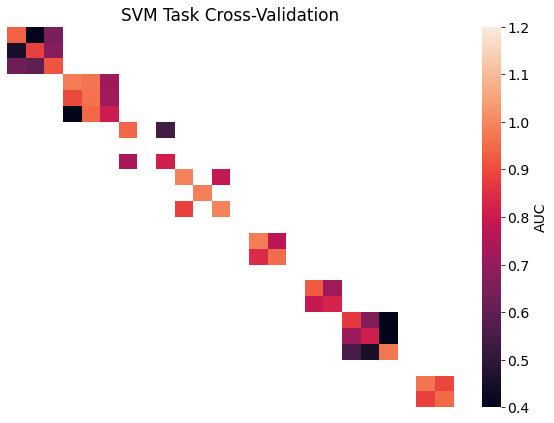

In [105]:
fig, ax = plt.subplots(figsize=(10,7))
mask=df_heat.values==0
sns.heatmap(df_heat, mask=mask, vmax=1.2,vmin=0.4,cmap="rocket",ax=ax, cbar_kws={'label': 'AUC'})

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("SVM Task Cross-Validation")

In [39]:
task_combs = list(itertools.product(["Pegboard","Pouring","Posture"],["Pegboard","Pouring","Posture"]))

[('Pegboard', 'Pegboard'),
 ('Pegboard', 'Pouring'),
 ('Pegboard', 'Posture'),
 ('Pouring', 'Pegboard'),
 ('Pouring', 'Pouring'),
 ('Pouring', 'Posture'),
 ('Posture', 'Pegboard'),
 ('Posture', 'Pouring'),
 ('Posture', 'Posture')]

In [5]:
EXPERIMENT = "train_all_v3"

WIN_LEN_SEC = 0.750

In [17]:
AUCs, Accs = [], []
durations = []
for pat_id in range(1,9):
    for task in ["Pegboard","Pouring","Posture"]:
        data1 = getattr(Patient(pat_id),task+"_off")
        if data1 is None:
            continue
        else:
            data1 = data1.load_1d()
            
            durations.append(data1.LFP.shape[-1]/2048.0/60)
            #rep = Reporter.from_pickle(pat_id, task, EXPERIMENT)
            #tasks.append(f"{rep.dataset.pat_id}/{rep.dataset.task}")
            #AUCs.append((rep.svm.valid.AUC['mean'],rep.beta.valid.AUC['mean'],rep.theta.valid.AUC['mean'],rep.cnn_1d.valid.AUC,rep.cnn_2d.valid.AUC))
            #Accs.append((rep.svm.valid.accuracy['mean'],rep.beta.valid.accuracy['mean'],rep.theta.valid.accuracy['mean'],rep.cnn_1d.valid.accuracy,rep.cnn_2d.valid.accuracy))
            

In [19]:
durations

[11.84853515625,
 6.876871744791667,
 7.690234375,
 12.576383463541667,
 5.108642578125,
 8.051692708333333,
 10.542830403645834,
 12.768107096354166,
 7.150594075520833,
 4.137679036458334,
 5.189982096354167,
 5.916292317708334,
 7.054874674479167,
 7.574763997395833,
 7.19541015625,
 7.861279296875,
 7.482145182291666,
 6.7149658203125,
 9.792073567708334,
 11.322412109375]

In [21]:
np.mean(durations)

8.142788492838543

Text(0, 0.5, '# of occurrences')

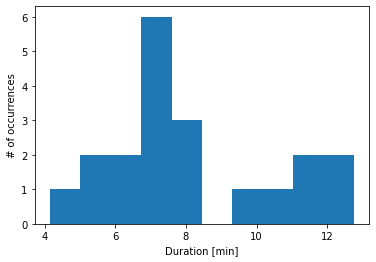

In [27]:
fig,ax = plt.subplots()

ax.hist(durations, bins=10)
ax.set_xlabel('Duration [min]')
ax.set_ylabel('# of occurrences')

In [ ]:
python

In [7]:
tasks

['1/Pegboard',
 '1/Pouring',
 '1/Posture',
 '2/Pegboard',
 '2/Pouring',
 '2/Posture',
 '3/Pegboard',
 '3/Posture',
 '4/Pegboard',
 '4/Pouring',
 '4/Posture',
 '5/Pouring',
 '5/Posture',
 '6/Pouring',
 '6/Posture',
 '7/Pegboard',
 '7/Pouring',
 '7/Posture',
 '8/Pouring',
 '8/Posture']

In [8]:
aucs = pd.DataFrame(AUCs,columns=["svm","beta","theta","cnn_1d","cnn_2d"])
accs = pd.DataFrame(Accs,columns=["svm","beta","theta","cnn_1d","cnn_2d"])

In [9]:
aucs = aucs[["svm","cnn_1d","cnn_2d","beta","theta"]]
aucs.index =tasks
accs = accs[["svm","cnn_1d","cnn_2d","beta","theta"]]
accs.index = tasks


In [30]:
aucs

,svm,cnn_1d,cnn_2d,beta,theta
1/Pegboard,0.733360,0.710140,0.702752,0.711135,0.584725
1/Pouring,0.803929,0.863384,0.808214,0.715750,0.809571
1/Posture,0.803927,0.734832,0.662784,0.736999,0.595233
2/Pegboard,0.985977,0.998878,0.992695,0.968282,0.986523
2/Pouring,0.906020,0.906907,0.906634,0.876843,0.913452
2/Posture,0.816838,0.856765,0.862500,0.851348,0.829828
3/Pegboard,0.836708,0.800290,0.841141,0.760440,0.708024
3/Posture,0.751667,0.875920,0.882261,0.669094,0.804425
4/Pegboard,0.975339,0.959322,0.870074,0.707358,0.637007
4/Pouring,0.930545,0.856203,0.794173,0.453008,0.694361


Text(0.5, 1.0, 'AUCs')

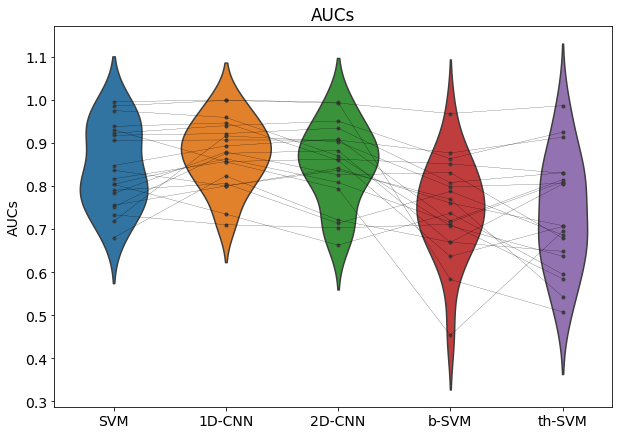

In [10]:
import matplotlib
font = {'size'   :14}
matplotlib.rc('font', **font)

fig,ax = plt.subplots(figsize=(10,7))
sns.violinplot(x=np.repeat([0,1,2,3,4],20),y=aucs.values.T.flatten(),inner='point',ax=ax)
ax.plot(aucs.values.T,c='k',linewidth=0.2)
ax.set_xticklabels(["SVM","1D-CNN","2D-CNN","b-SVM","th-SVM"]);

ax.set_ylabel("AUCs")
ax.set_title("AUCs")

Text(0.5, 1.0, 'Accuracies')

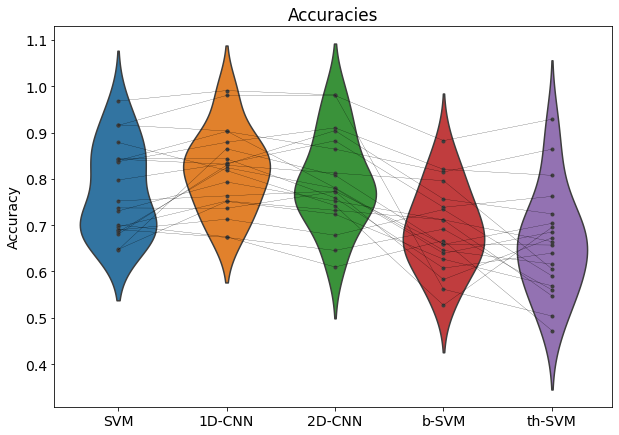

In [11]:
fig,ax = plt.subplots(figsize=(10,7))
sns.violinplot(x=np.repeat([0,1,2,3,4],20),y=accs.values.T.flatten(),inner='point',ax=ax)
ax.plot(list(range(0,5)),accs.values.T,c='k',linewidth=0.2)
ax.set_xticklabels(["SVM","1D-CNN","2D-CNN","b-SVM","th-SVM"]);
ax.set_ylabel("Accuracy")
ax.set_title("Accuracies")

In [26]:
aucs[aucs["svm"]-aucs["cnn_1d"]>0.02]

,svm,cnn_1d,cnn_2d,beta,theta
1/Pegboard,0.733360,0.710140,0.702752,0.711135,0.584725
1/Posture,0.803927,0.734832,0.662784,0.736999,0.595233
3/Pegboard,0.836708,0.800290,0.841141,0.760440,0.708024
4/Pouring,0.930545,0.856203,0.794173,0.453008,0.694361


In [27]:
accs[accs["svm"]-accs["cnn_1d"]>0.02]

,svm,cnn_1d,cnn_2d,beta,theta
1/Posture,0.700813,0.674797,0.609756,0.666667,0.472358
4/Pouring,0.878788,0.818182,0.742424,0.527273,0.695455


In [13]:
accs[accs["svm"]-accs["cnn_1d"]<-0.06]

,svm,cnn_1d,cnn_2d,beta,theta
2/Pegboard,0.915423,0.980198,0.980100,0.882587,0.928856
2/Pouring,0.839506,0.902439,0.864198,0.814815,0.864198
2/Posture,0.680469,0.829457,0.812500,0.796094,0.605469
3/Posture,0.684804,0.824390,0.779412,0.639216,0.685294
6/Pouring,0.730579,0.793388,0.752066,0.711570,0.664463
7/Pegboard,0.646400,0.865079,0.808000,0.658400,0.704000
8/Posture,0.647514,0.751381,0.723757,0.626519,0.569061


In [14]:
from scipy.stats import ttest_rel

In [15]:
ttest_rel(accs['svm'].values,accs['cnn_1d'].values,alternative='less')

Ttest_relResult(statistic=-2.8474287059250414, pvalue=0.005150022557229893)

In [29]:
ttest_rel(aucs['svm'].values,aucs['cnn_1d'].values,alternative='less')

Ttest_relResult(statistic=-1.946181068114883, pvalue=0.03328765283235287)

In [16]:
np.mean(accs['svm'].values < accs['cnn_1d'].values)

0.65

In [17]:
Reporter.from_pickle(4, "Posture", EXPERIMENT).svm.svm_coef

,mean,std
pow0_2_7Hz,0.014089,0.018963
pow0_8_12Hz,-0.028045,0.012509
pow0_13_20Hz,0.112289,0.011808
pow0_21_30Hz,-0.127143,0.012004
pow0_31_45Hz,-0.055397,0.007834
pow0_46_60Hz,-0.248795,0.020159
pow0_61_75Hz,0.031221,0.009789
pow0_76_100Hz,0.193243,0.010949
pow1_2_7Hz,-0.160915,0.009517
pow1_8_12Hz,-0.259846,0.019731


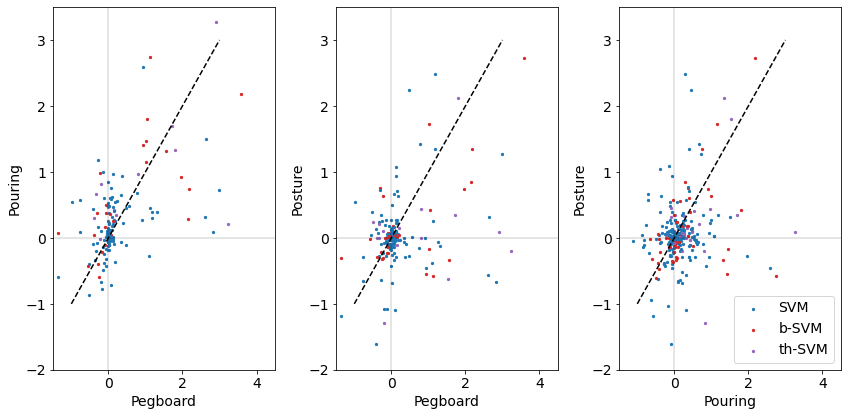

In [18]:
fig, ax = plt.subplots(1,3,figsize=(12,6),)

coefs_pegboard, coefs_pouring, coefs_posture = [],[],[]

for pat_id in range(1,9):
    coefs_pegboard, coefs_pouring, coefs_posture = None, None, None
    for task in ["Pegboard","Pouring","Posture"]:
        data1 = getattr(Patient(pat_id),task+"_off")
        if data1 is None:
            continue
        else:
            if pat_id == 4:
                continue
            rep = Reporter.from_pickle(pat_id, task, EXPERIMENT)
            if task == "Pegboard":
                coefs_pegboard=[rep.svm.svm_coef['mean'].values,rep.beta.svm_coef['mean'].values,rep.theta.svm_coef['mean'].values]
                
            if task == "Pouring":
                coefs_pouring = [rep.svm.svm_coef['mean'].values,rep.beta.svm_coef['mean'].values,rep.theta.svm_coef['mean'].values]
                
            if task == "Posture":
                coefs_posture = [rep.svm.svm_coef['mean'].values,rep.beta.svm_coef['mean'].values,rep.theta.svm_coef['mean'].values]
    
    if (coefs_pegboard is not None) and (coefs_pouring is not None):
        ax[0].scatter(coefs_pegboard[0],coefs_pouring[0],marker='o',c='C0',s=5, )
        ax[0].scatter(coefs_pegboard[1],coefs_pouring[1],marker='o',c='C3',s=5, )
        ax[0].scatter(coefs_pegboard[2],coefs_pouring[2],marker='o',c='C4',s=5, )

        
    if (coefs_pegboard is not None) and (coefs_posture is not None):
        ax[1].scatter(coefs_pegboard[0],coefs_posture[0],marker='o',c='C0',s=5)
        ax[1].scatter(coefs_pegboard[1],coefs_posture[1],marker='o',c='C3',s=5)
        ax[1].scatter(coefs_pegboard[2],coefs_posture[2],marker='o',c='C4',s=5)
        
    if (coefs_pouring is not None) and (coefs_posture is not None):
        el1=ax[2].scatter(coefs_pouring[0],coefs_posture[0],marker='o',c='C0',s=5,label="SVM")
        el2=ax[2].scatter(coefs_pouring[1],coefs_posture[1],marker='o',c='C3',s=5,label="b-SVM")
        el3=ax[2].scatter(coefs_pouring[2],coefs_posture[2],marker='o',c='C4',s=5,label="th-SVM")

        
ax[0].set_xlabel('Pegboard'); ax[0].set_ylabel('Pouring'); 
ax[1].set_xlabel('Pegboard'); ax[1].set_ylabel('Posture'); 
ax[2].set_xlabel('Pouring'); ax[2].set_ylabel('Posture'); 

ax[0].plot((-1,3),(-1,3),'k--')
ax[1].plot((-1,3),(-1,3),'k--')
ax[2].plot((-1,3),(-1,3),'k--')

for ii in range(3):
    ax[ii].axhline(color='k',linewidth=0.2)
    ax[ii].axvline(color='k',linewidth=0.2)
    ax[ii].set_ylim((-2, 3.5))
    ax[ii].set_xlim((-1.5, 4.5))

ax[2].legend([el1,el2,el3],["SVM","b-SVM","th-SVM"])

plt.tight_layout()

In [19]:
plt.close('all')